# Trial Exploratory Data Analysis

## Breaking down the task

1. Vizualize all variables
2. What variable can select `log_day_sequence < 2`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/data_sample.csv')

In [3]:
df.head()

,Unnamed: 0,episode_type,episode_id,show_id,user_id,log_date,view_start_time,view_end_time,view_percent,log_day_sequence
0,0,a,ep00000002,s00000002,uu00000002,2024-02-01,2024-02-01 12:13:10,2024-02-01 12:13:24,0.000,1
1,1,a,ep00000002,s00000002,uu00000016,2024-02-02,2024-02-02 23:32:55,2024-02-02 23:34:01,9.091,1
2,2,a,ep00000002,s00000002,uu00000049,2024-02-03,2024-02-03 12:37:43,2024-02-03 12:38:46,9.091,1
3,3,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:59:06,2024-02-03 21:00:27,27.273,1
4,4,a,ep00000002,s00000002,uu00000050,2024-02-03,2024-02-03 20:56:40,2024-02-03 20:57:09,9.091,1


In [34]:
df1 = df[df['log_day_sequence'] < 2]
df2 = df[df['log_day_sequence'] > 1]
df3 = df[df['log_day_sequence'] >= 2]

In [53]:
df1.isna().sum()

Unnamed: 0          0
episode_type        0
episode_id          0
show_id             0
user_id             7
log_date            0
view_start_time     0
view_end_time       0
view_percent        0
log_day_sequence    0
short_episode_id    0
short_show_id       0
short_user_id       7
view_duration       0
dtype: int64

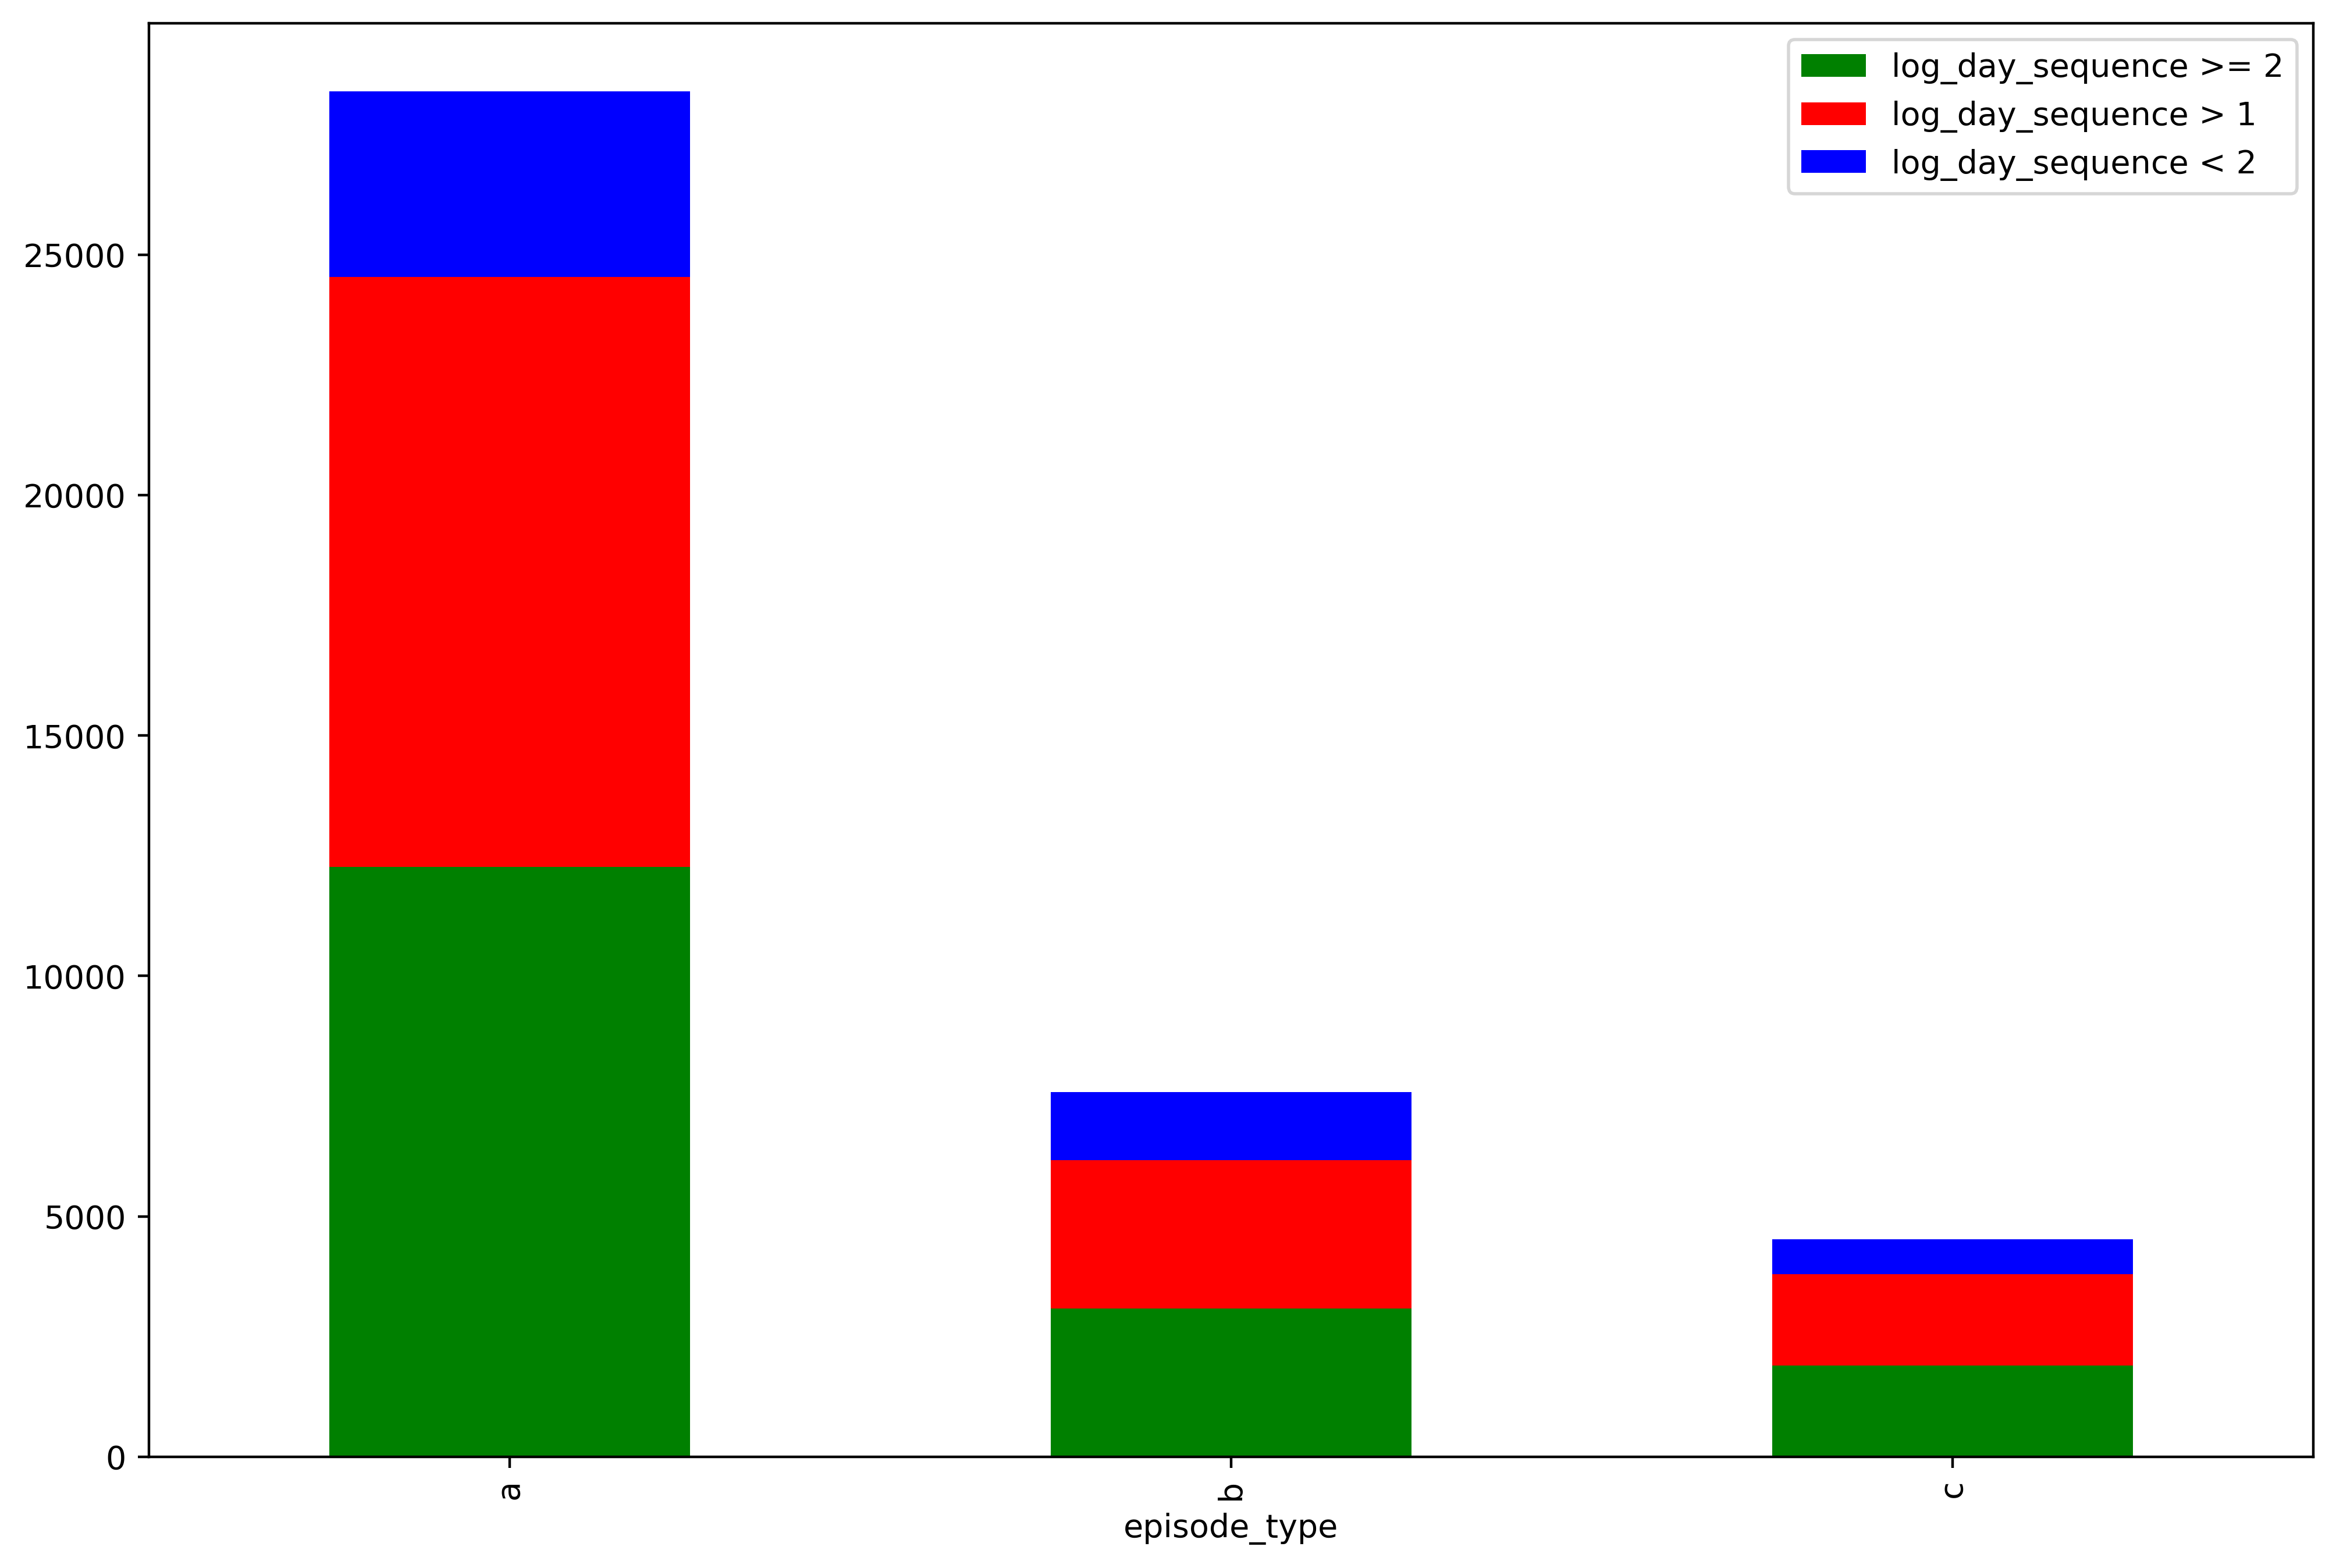

In [59]:
plt.figure(figsize=(12,8), dpi=400)

df1_episode_types = df1['episode_type'].value_counts()
df2_episode_types = df2['episode_type'].value_counts()
df3_episode_types = df3['episode_type'].value_counts()

df3_episode_types.plot(kind='bar', color='green', label='log_day_sequence >= 2')
df2_episode_types.plot(kind='bar', color='red', bottom=df3_episode_types, label='log_day_sequence > 1')
df1_episode_types.plot(kind='bar', color='blue', bottom=df3_episode_types + df2_episode_types, label='log_day_sequence < 2')

plt.legend()
plt.show()


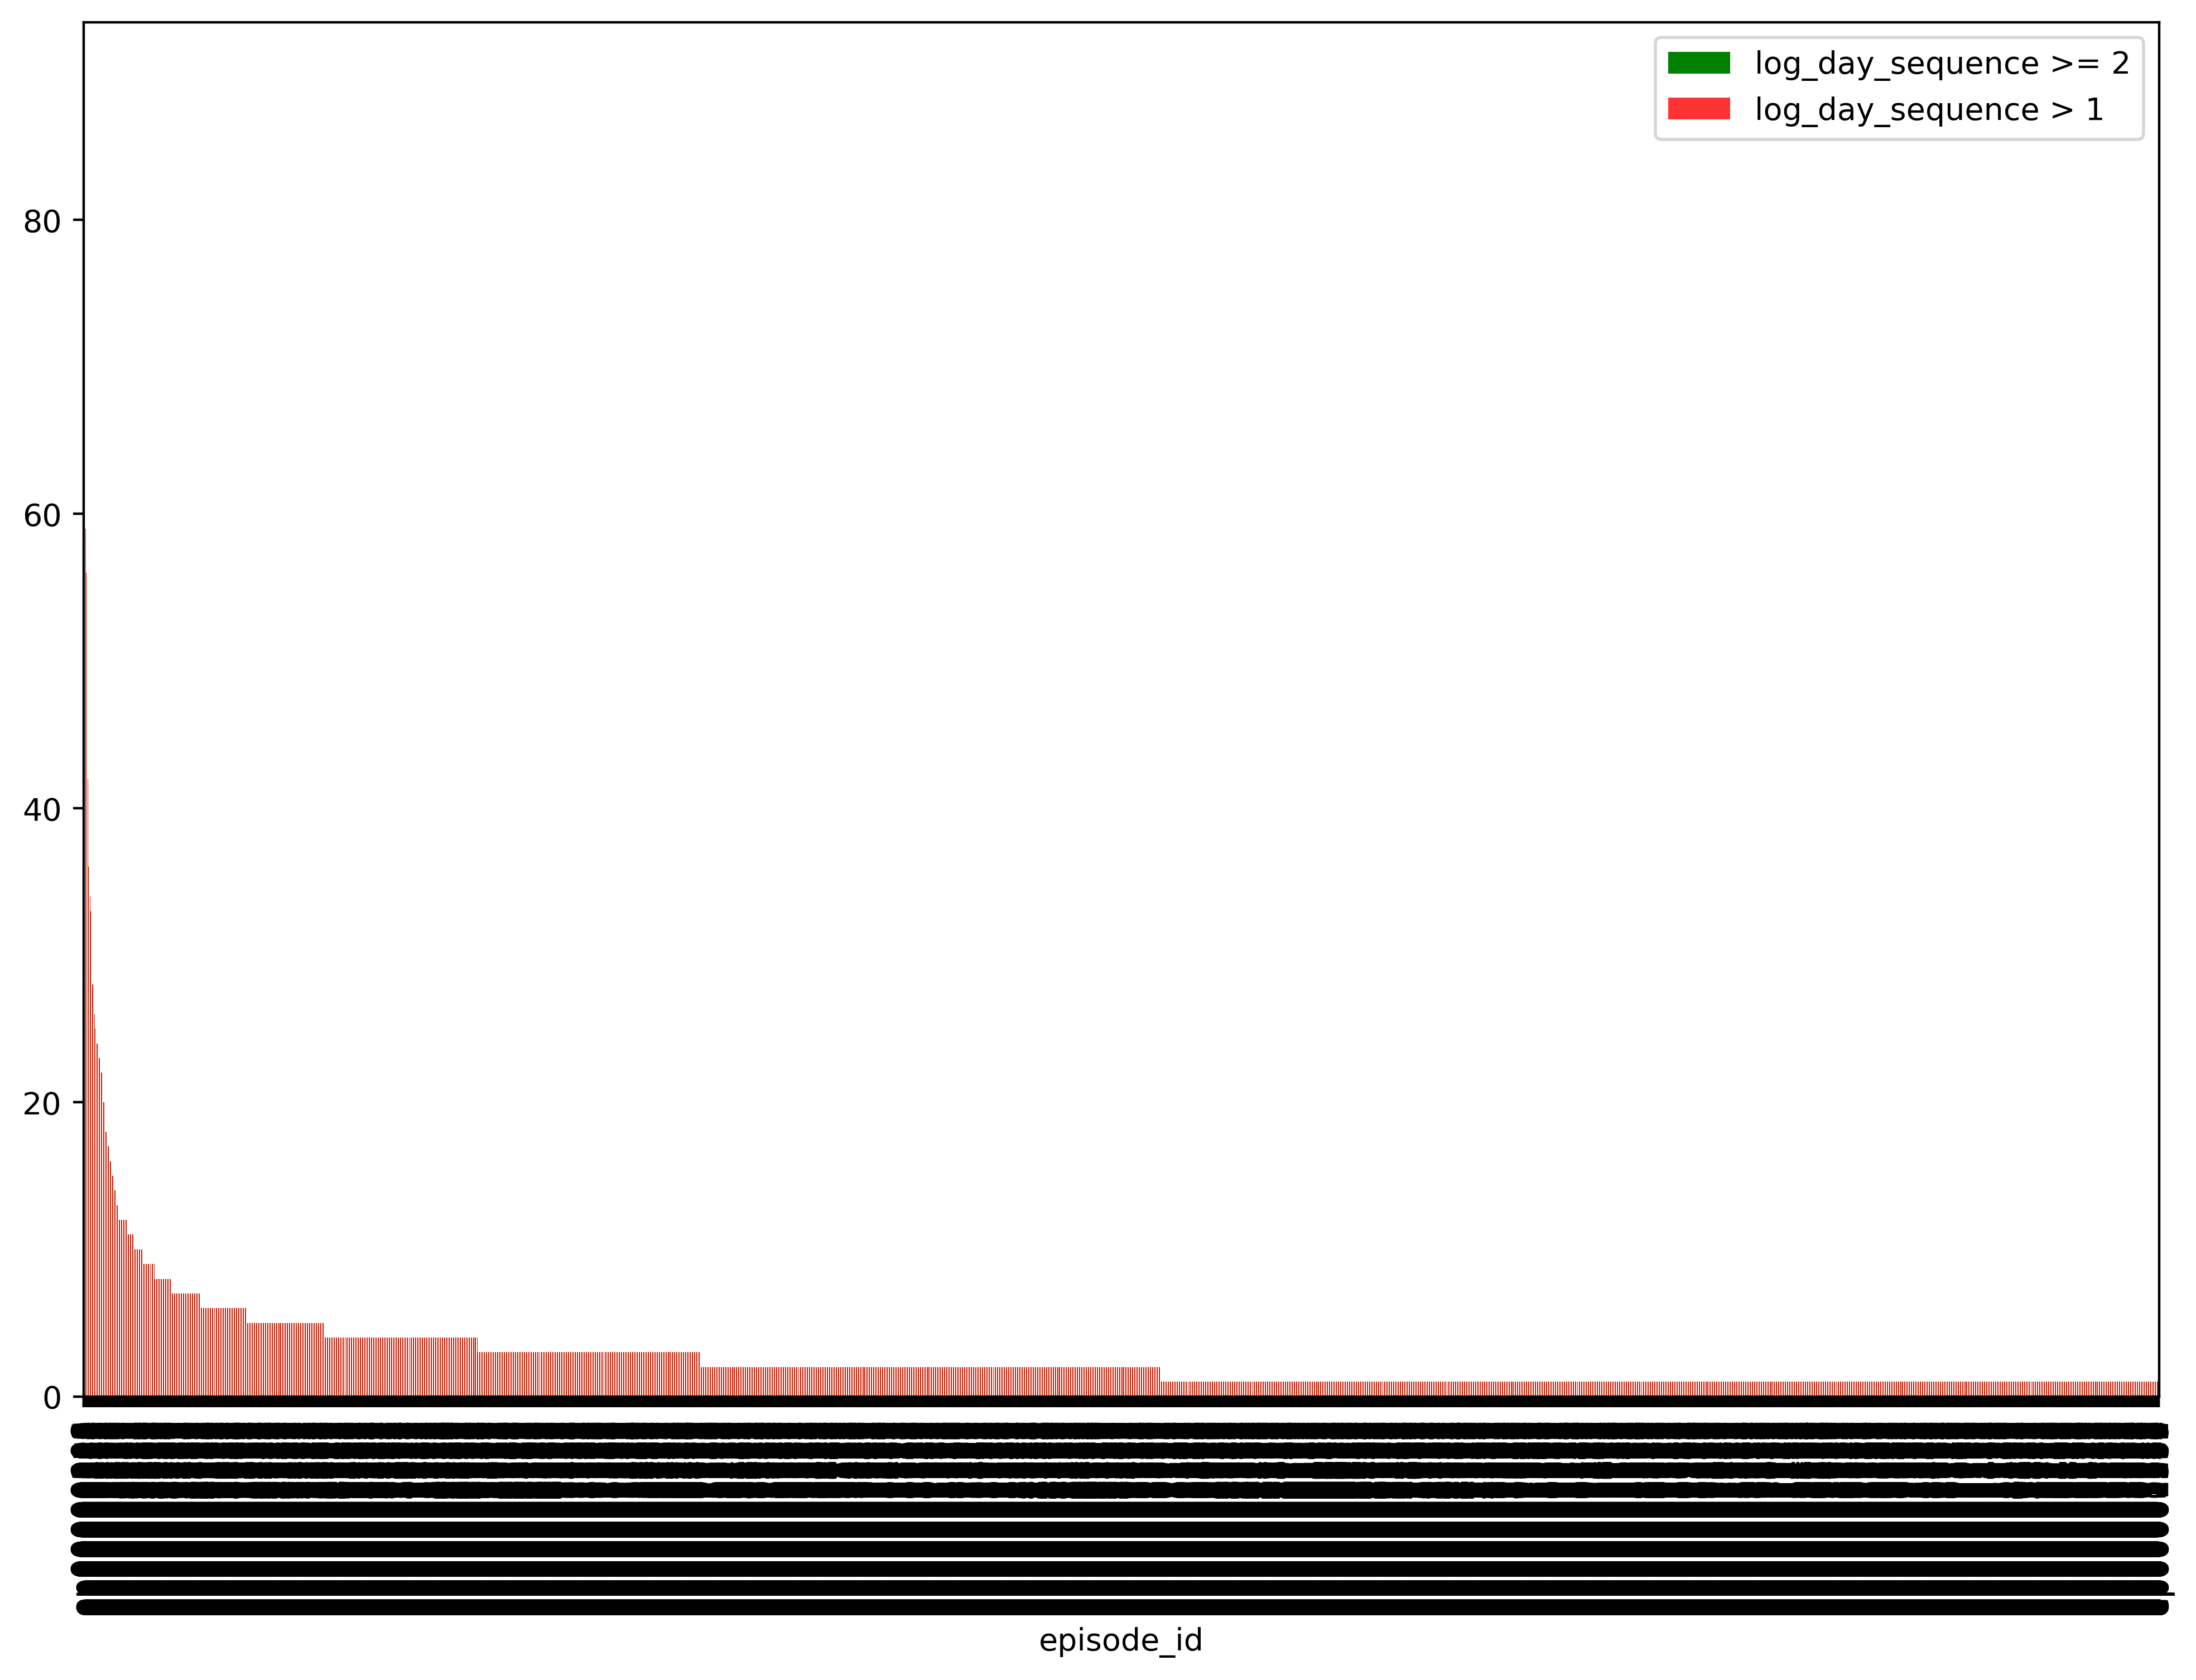

In [62]:
plt.figure(figsize=(12,8), dpi=400)

df1_episode_ids = df1['episode_id'].value_counts()
df2_episode_ids = df2['episode_id'].value_counts()
df3_episode_ids = df3['episode_id'].value_counts()

df3_episode_ids.plot(kind='bar', color='green', label='log_day_sequence >= 2')
df2_episode_ids.plot(kind='bar', color='red', alpha=0.8, label='log_day_sequence > 1')
#df1_episode_ids.plot(kind='bar', color='blue', bottom=df3_episode_ids + df2_episode_ids, label='log_day_sequence < 2')

plt.legend()
plt.show()

## `episode_type`

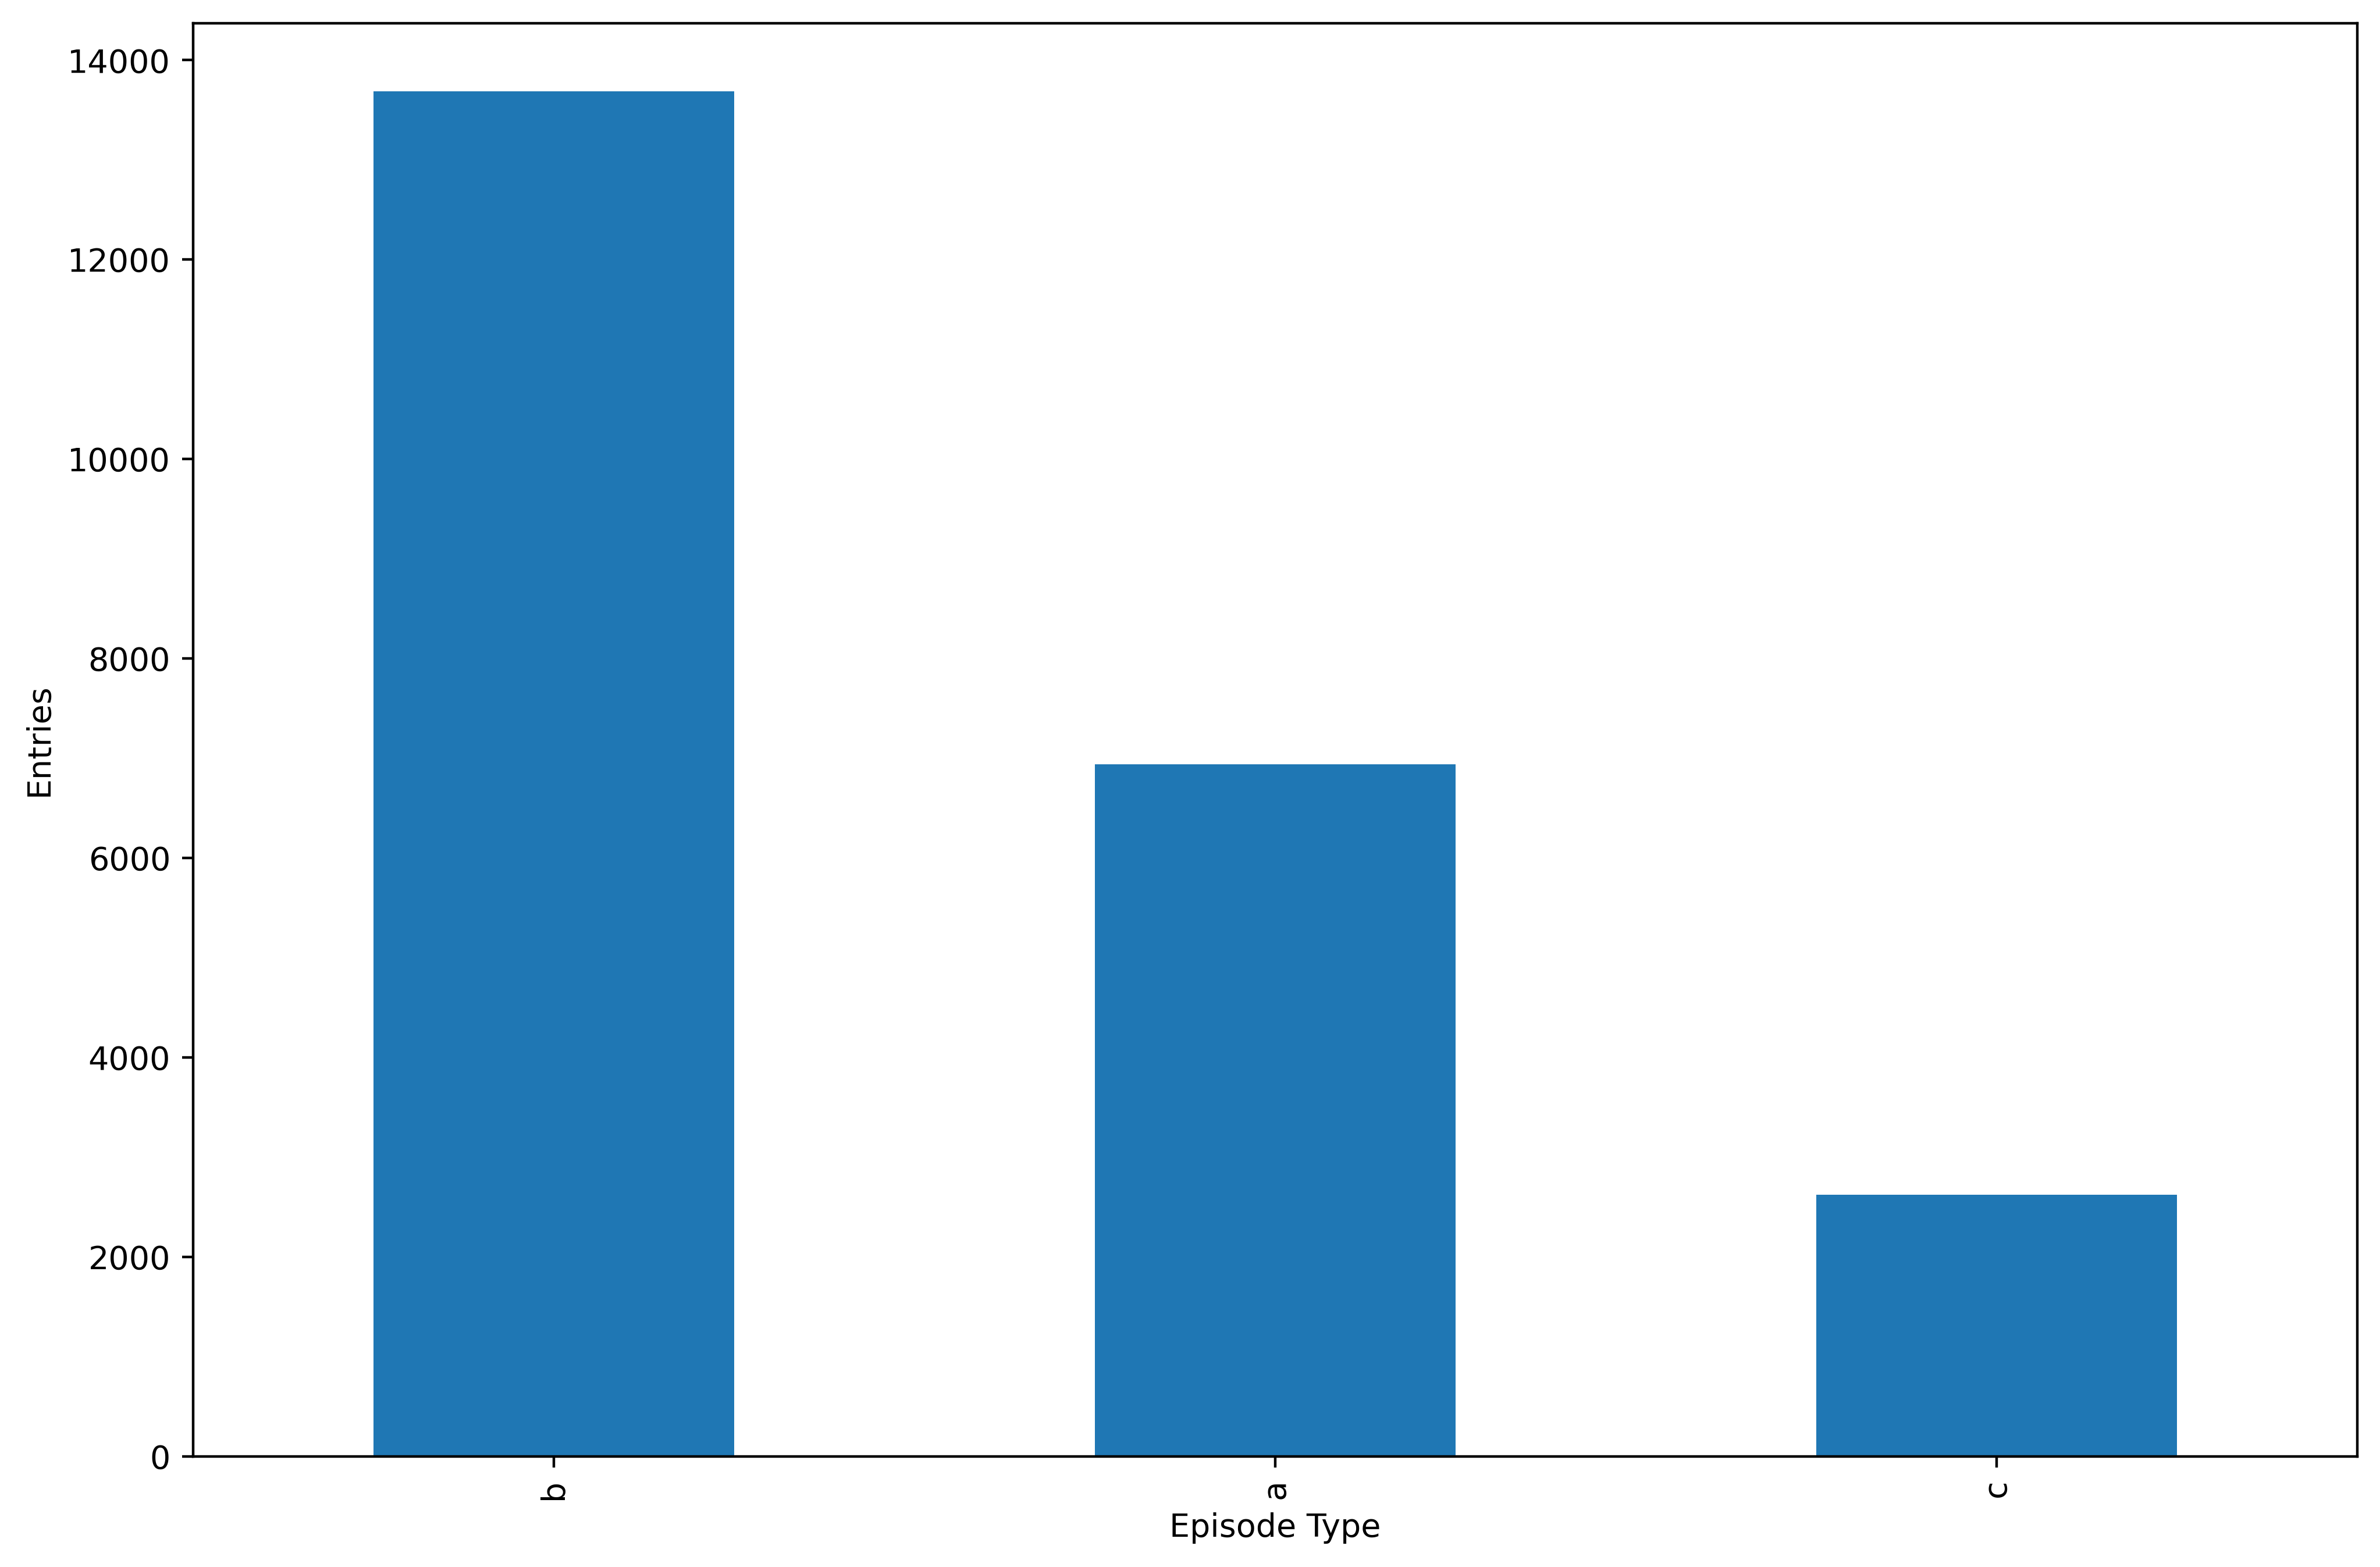

In [11]:
plt.figure(figsize=(12,8), dpi=400)

episode_types = df['episode_type'].value_counts()
episode_types.plot(kind = 'bar')


plt.xlabel('Episode Type')
plt.ylabel('Entries')

plt.savefig('./presen/fig/episodeType.png')
plt.show()

## `episode_id`


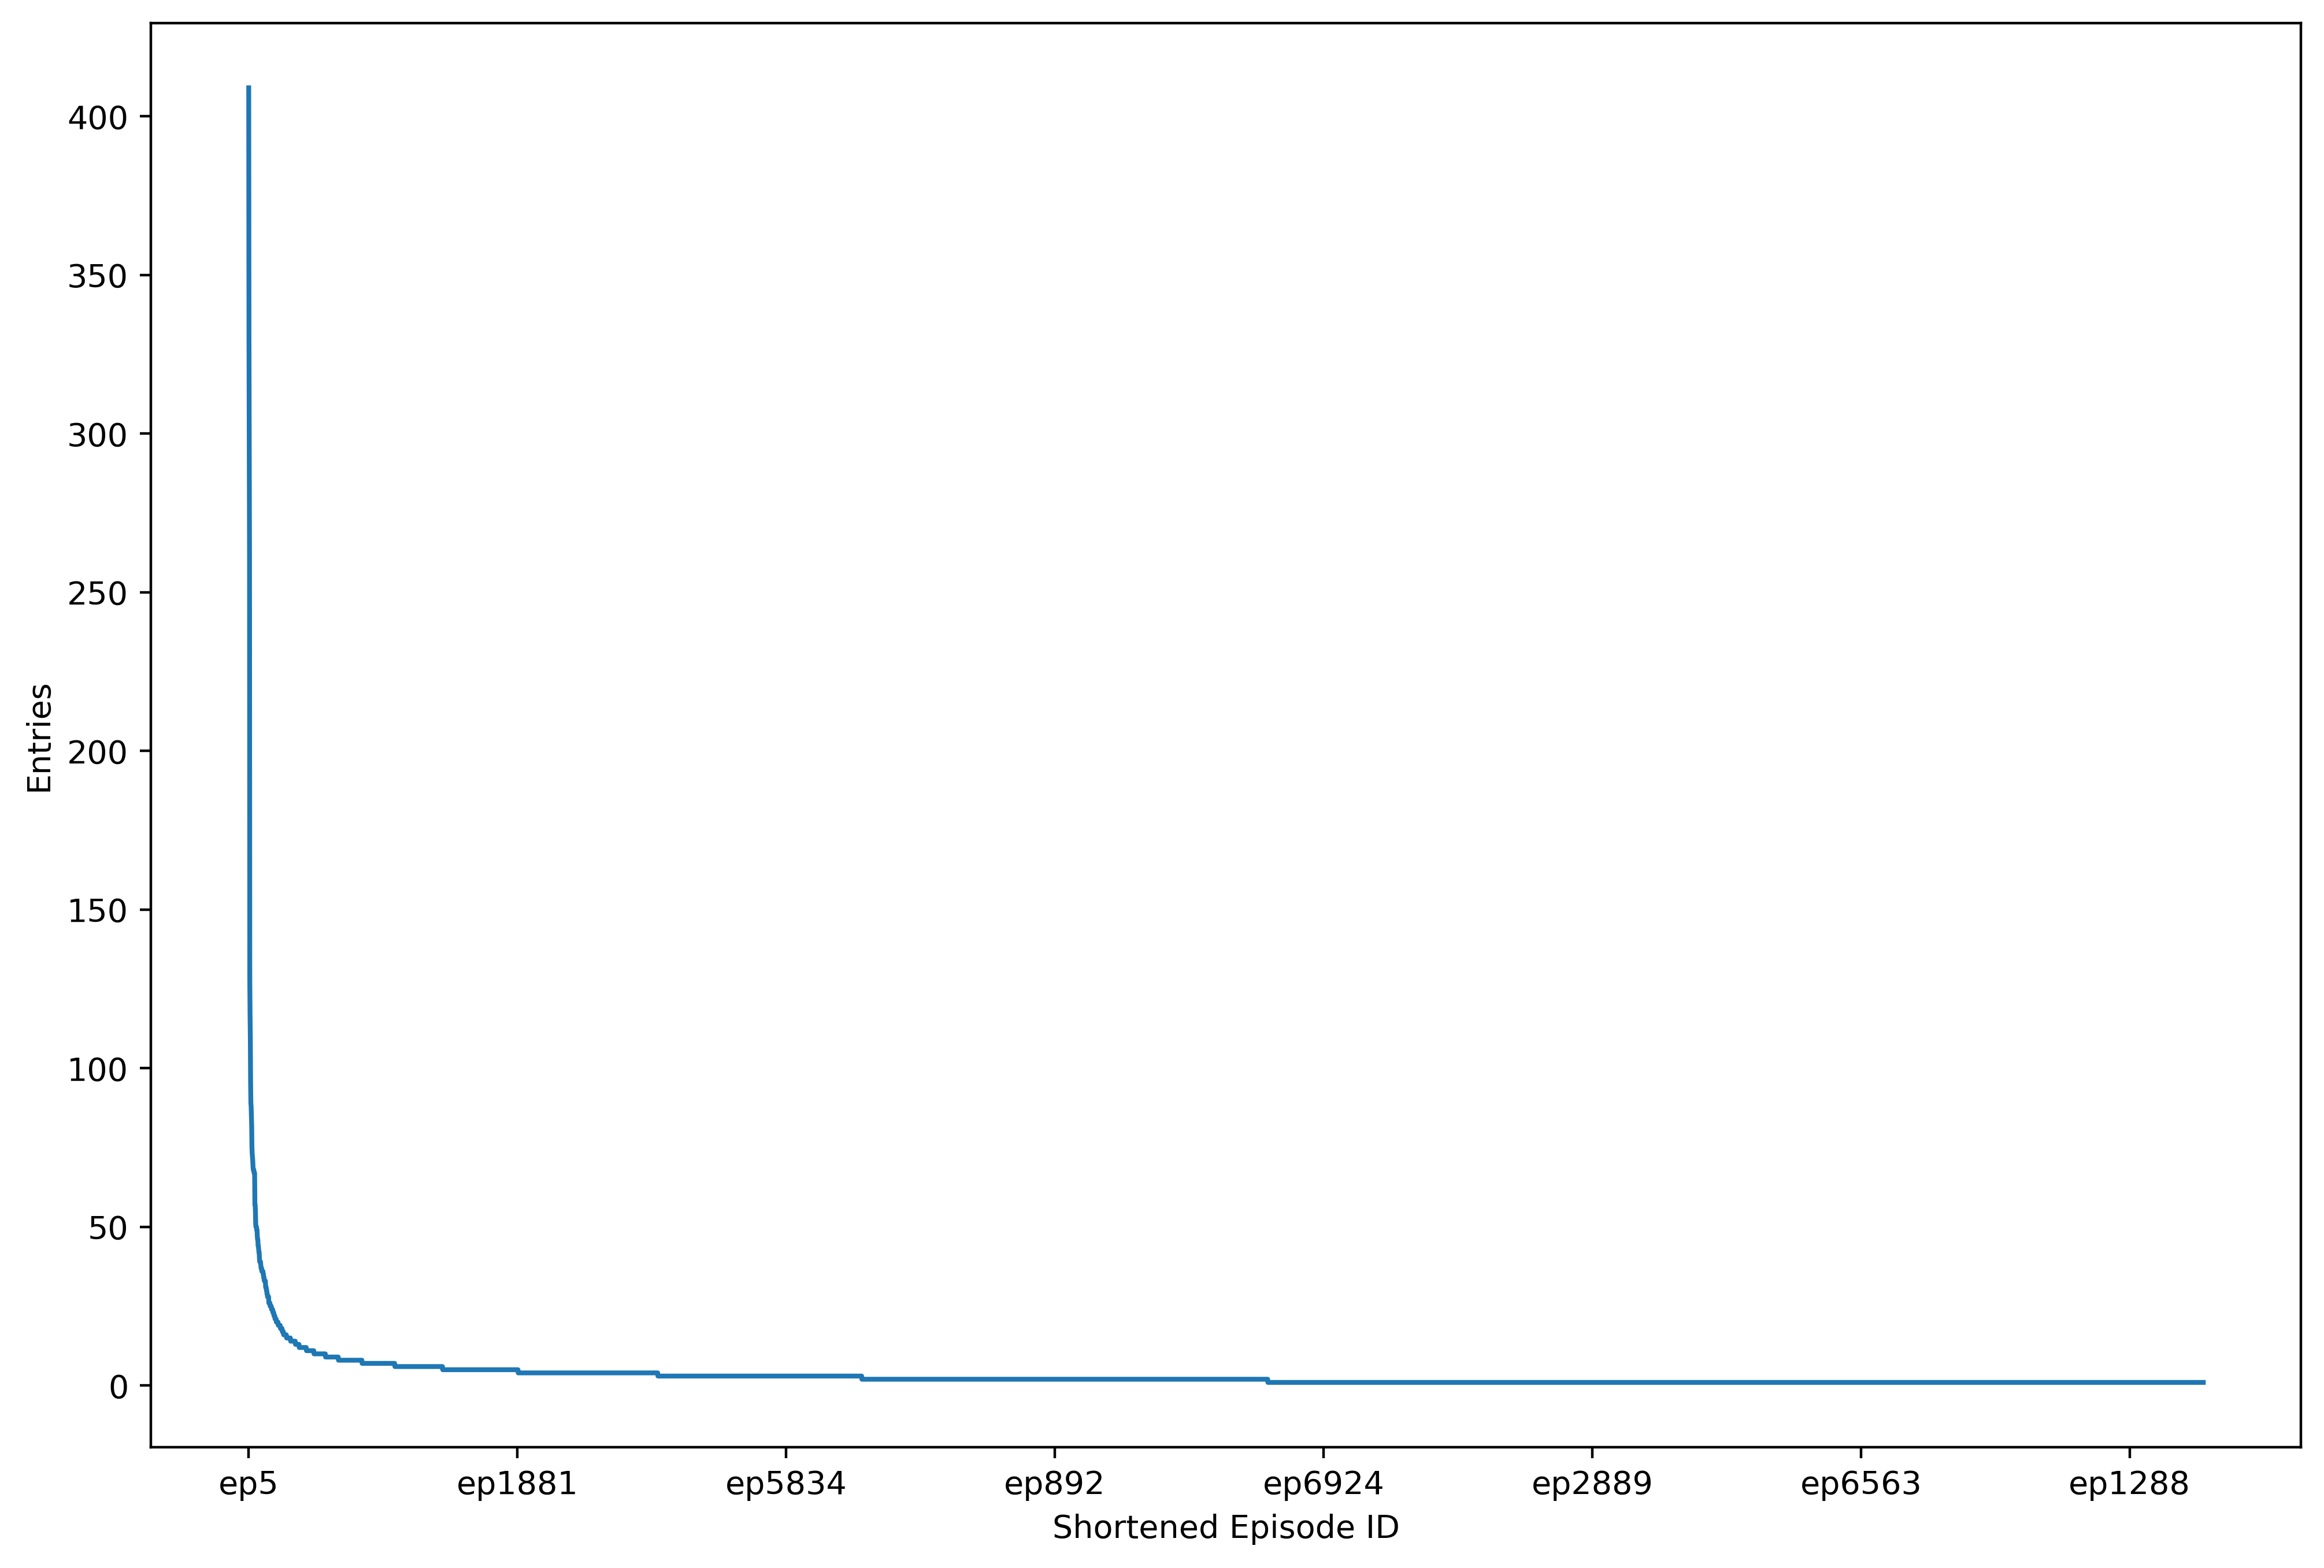

In [10]:
df['short_episode_id'] = df['episode_id'].str.replace(r'^ep0+', 'ep', regex = True)

short_episode_count = df['short_episode_id'].value_counts()
plt.figure(figsize=(12,8), dpi=400)
short_episode_count.plot(kind = 'line')

plt.xlabel('Shortened Episode ID')
plt.ylabel('Entries')

plt.savefig('./presen/fig/episodeId.png')
#plt.xticks(ticks=range(len(df['short_episode_id'])), rotation=45)

plt.show()

## `show_id`

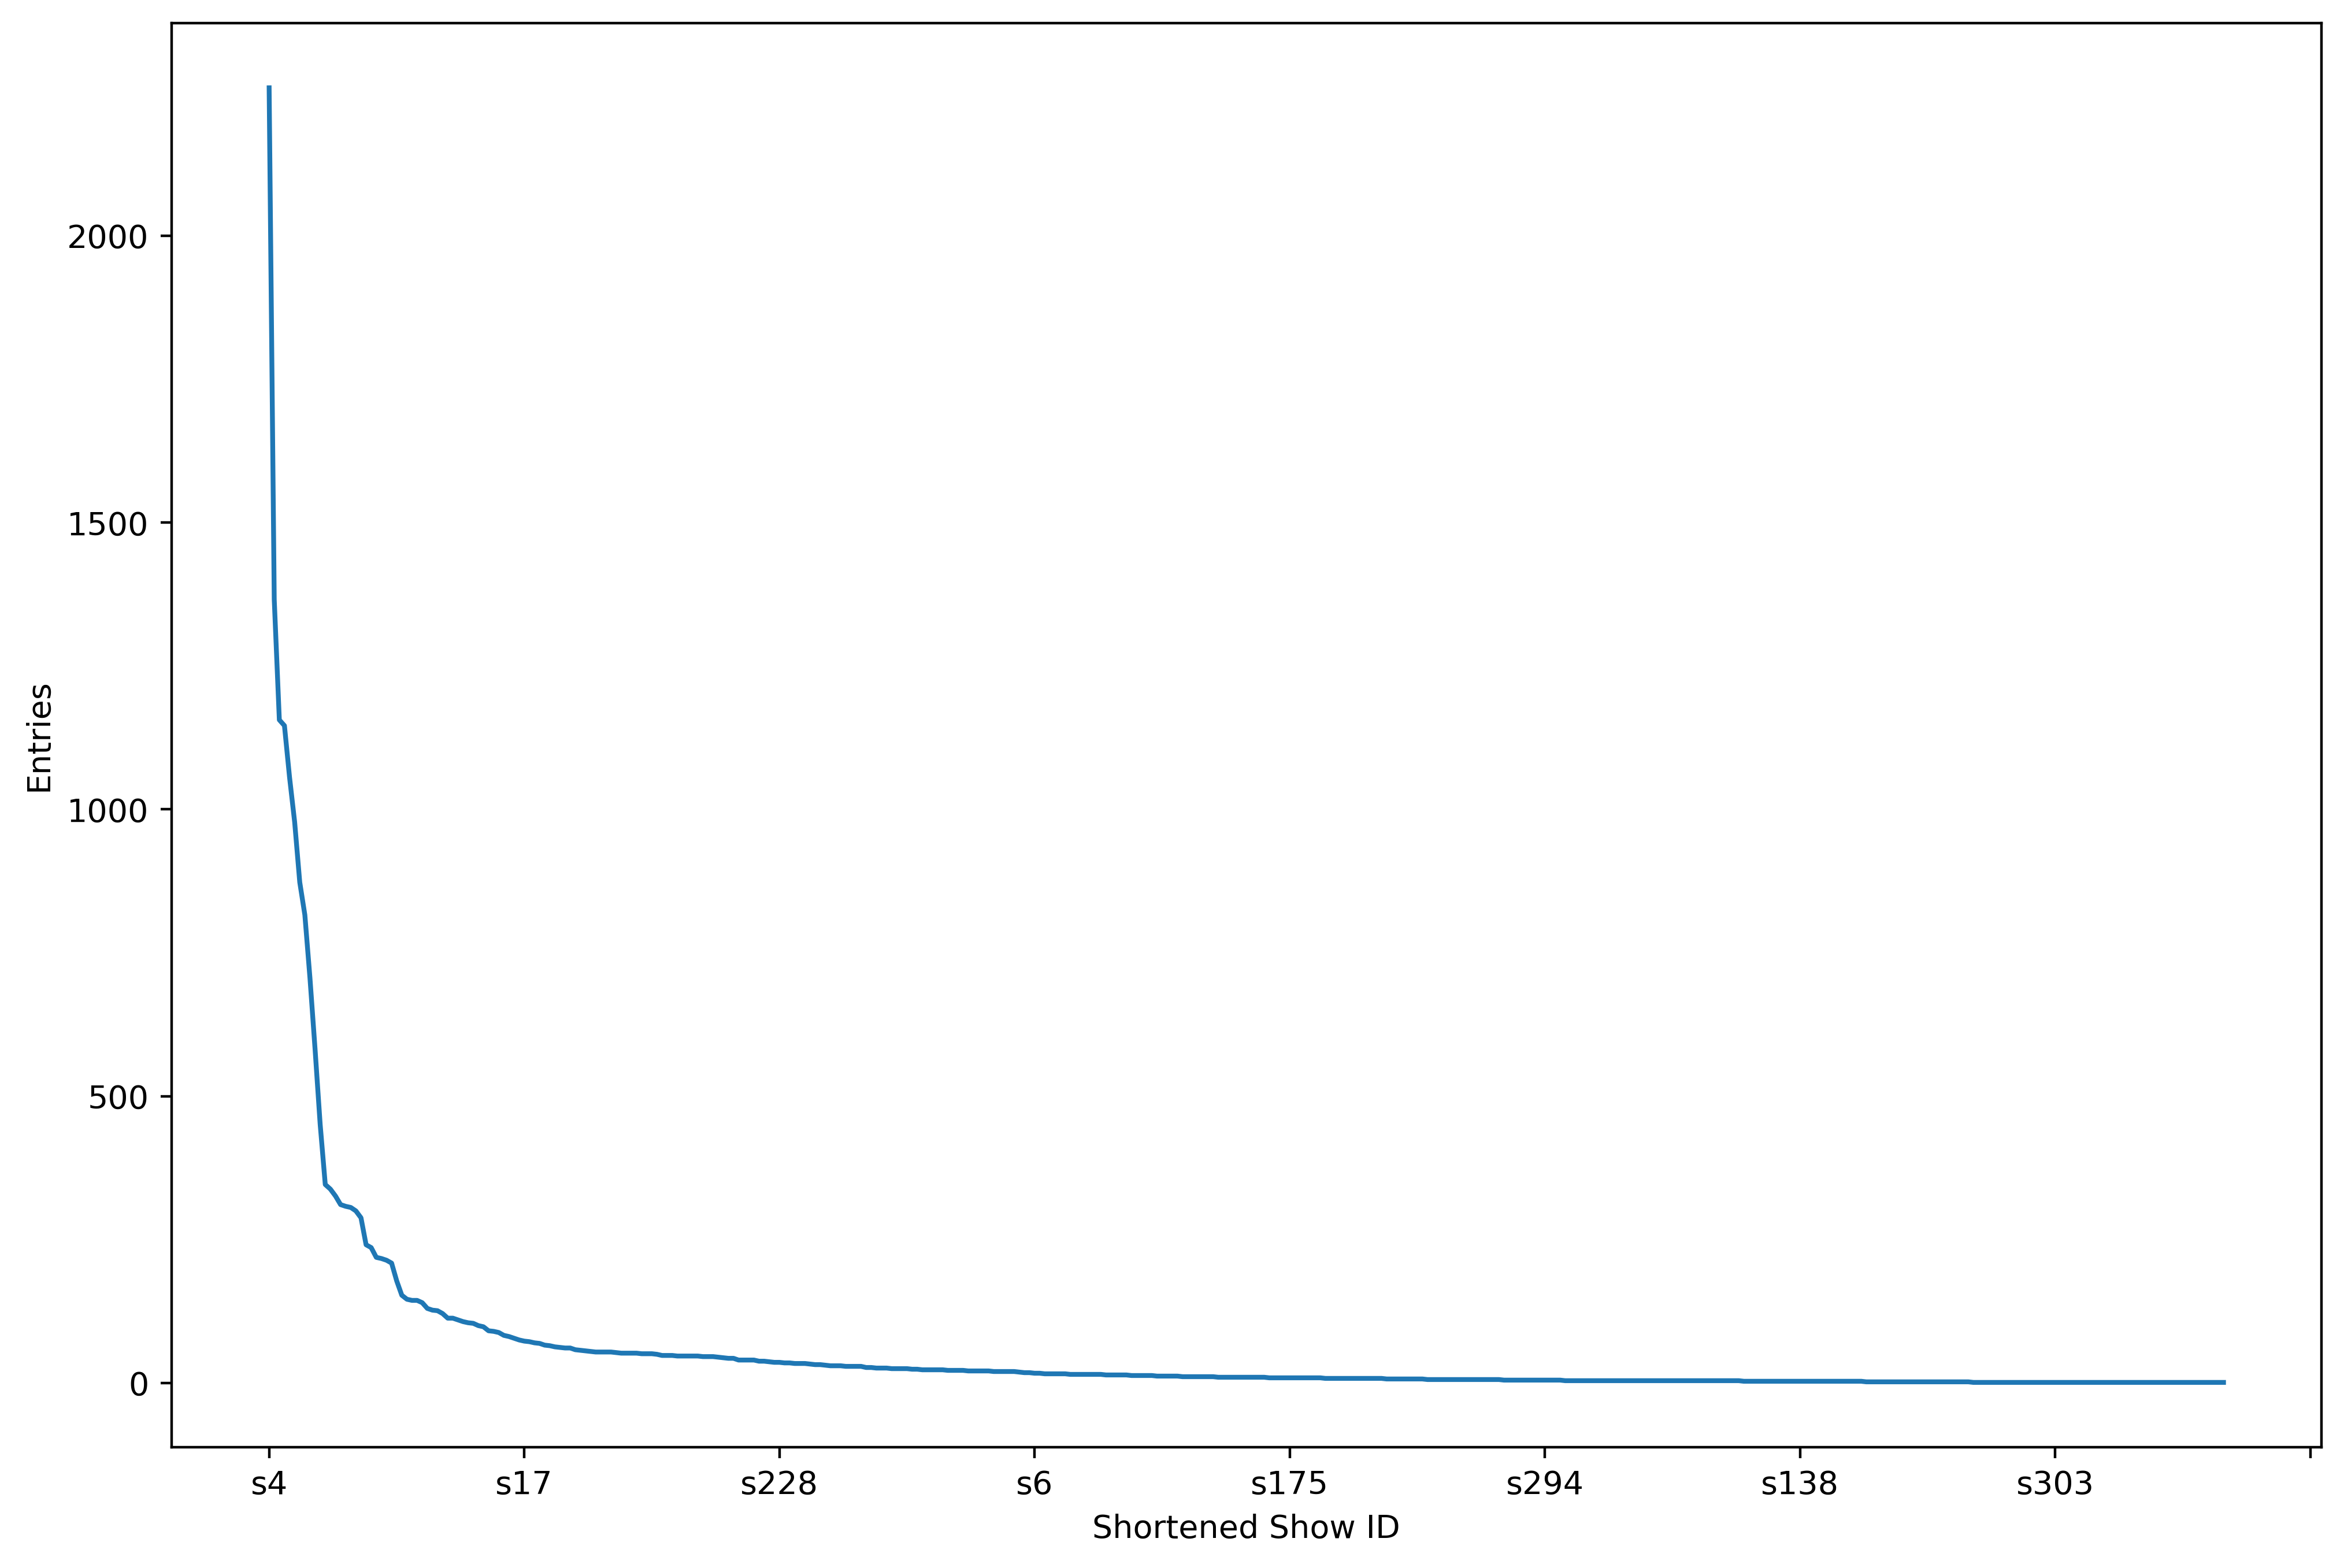

In [12]:
df['short_show_id'] = df['show_id'].str.replace(r'^s0+', 's', regex=True)

show_id_count = df['short_show_id'].value_counts()
plt.figure(figsize=(12,8), dpi=400)
show_id_count.plot(kind='line')

plt.xlabel('Shortened Show ID')
plt.ylabel('Entries')

plt.savefig('./presen/fig/showId.png')
plt.show()

## `user_id`

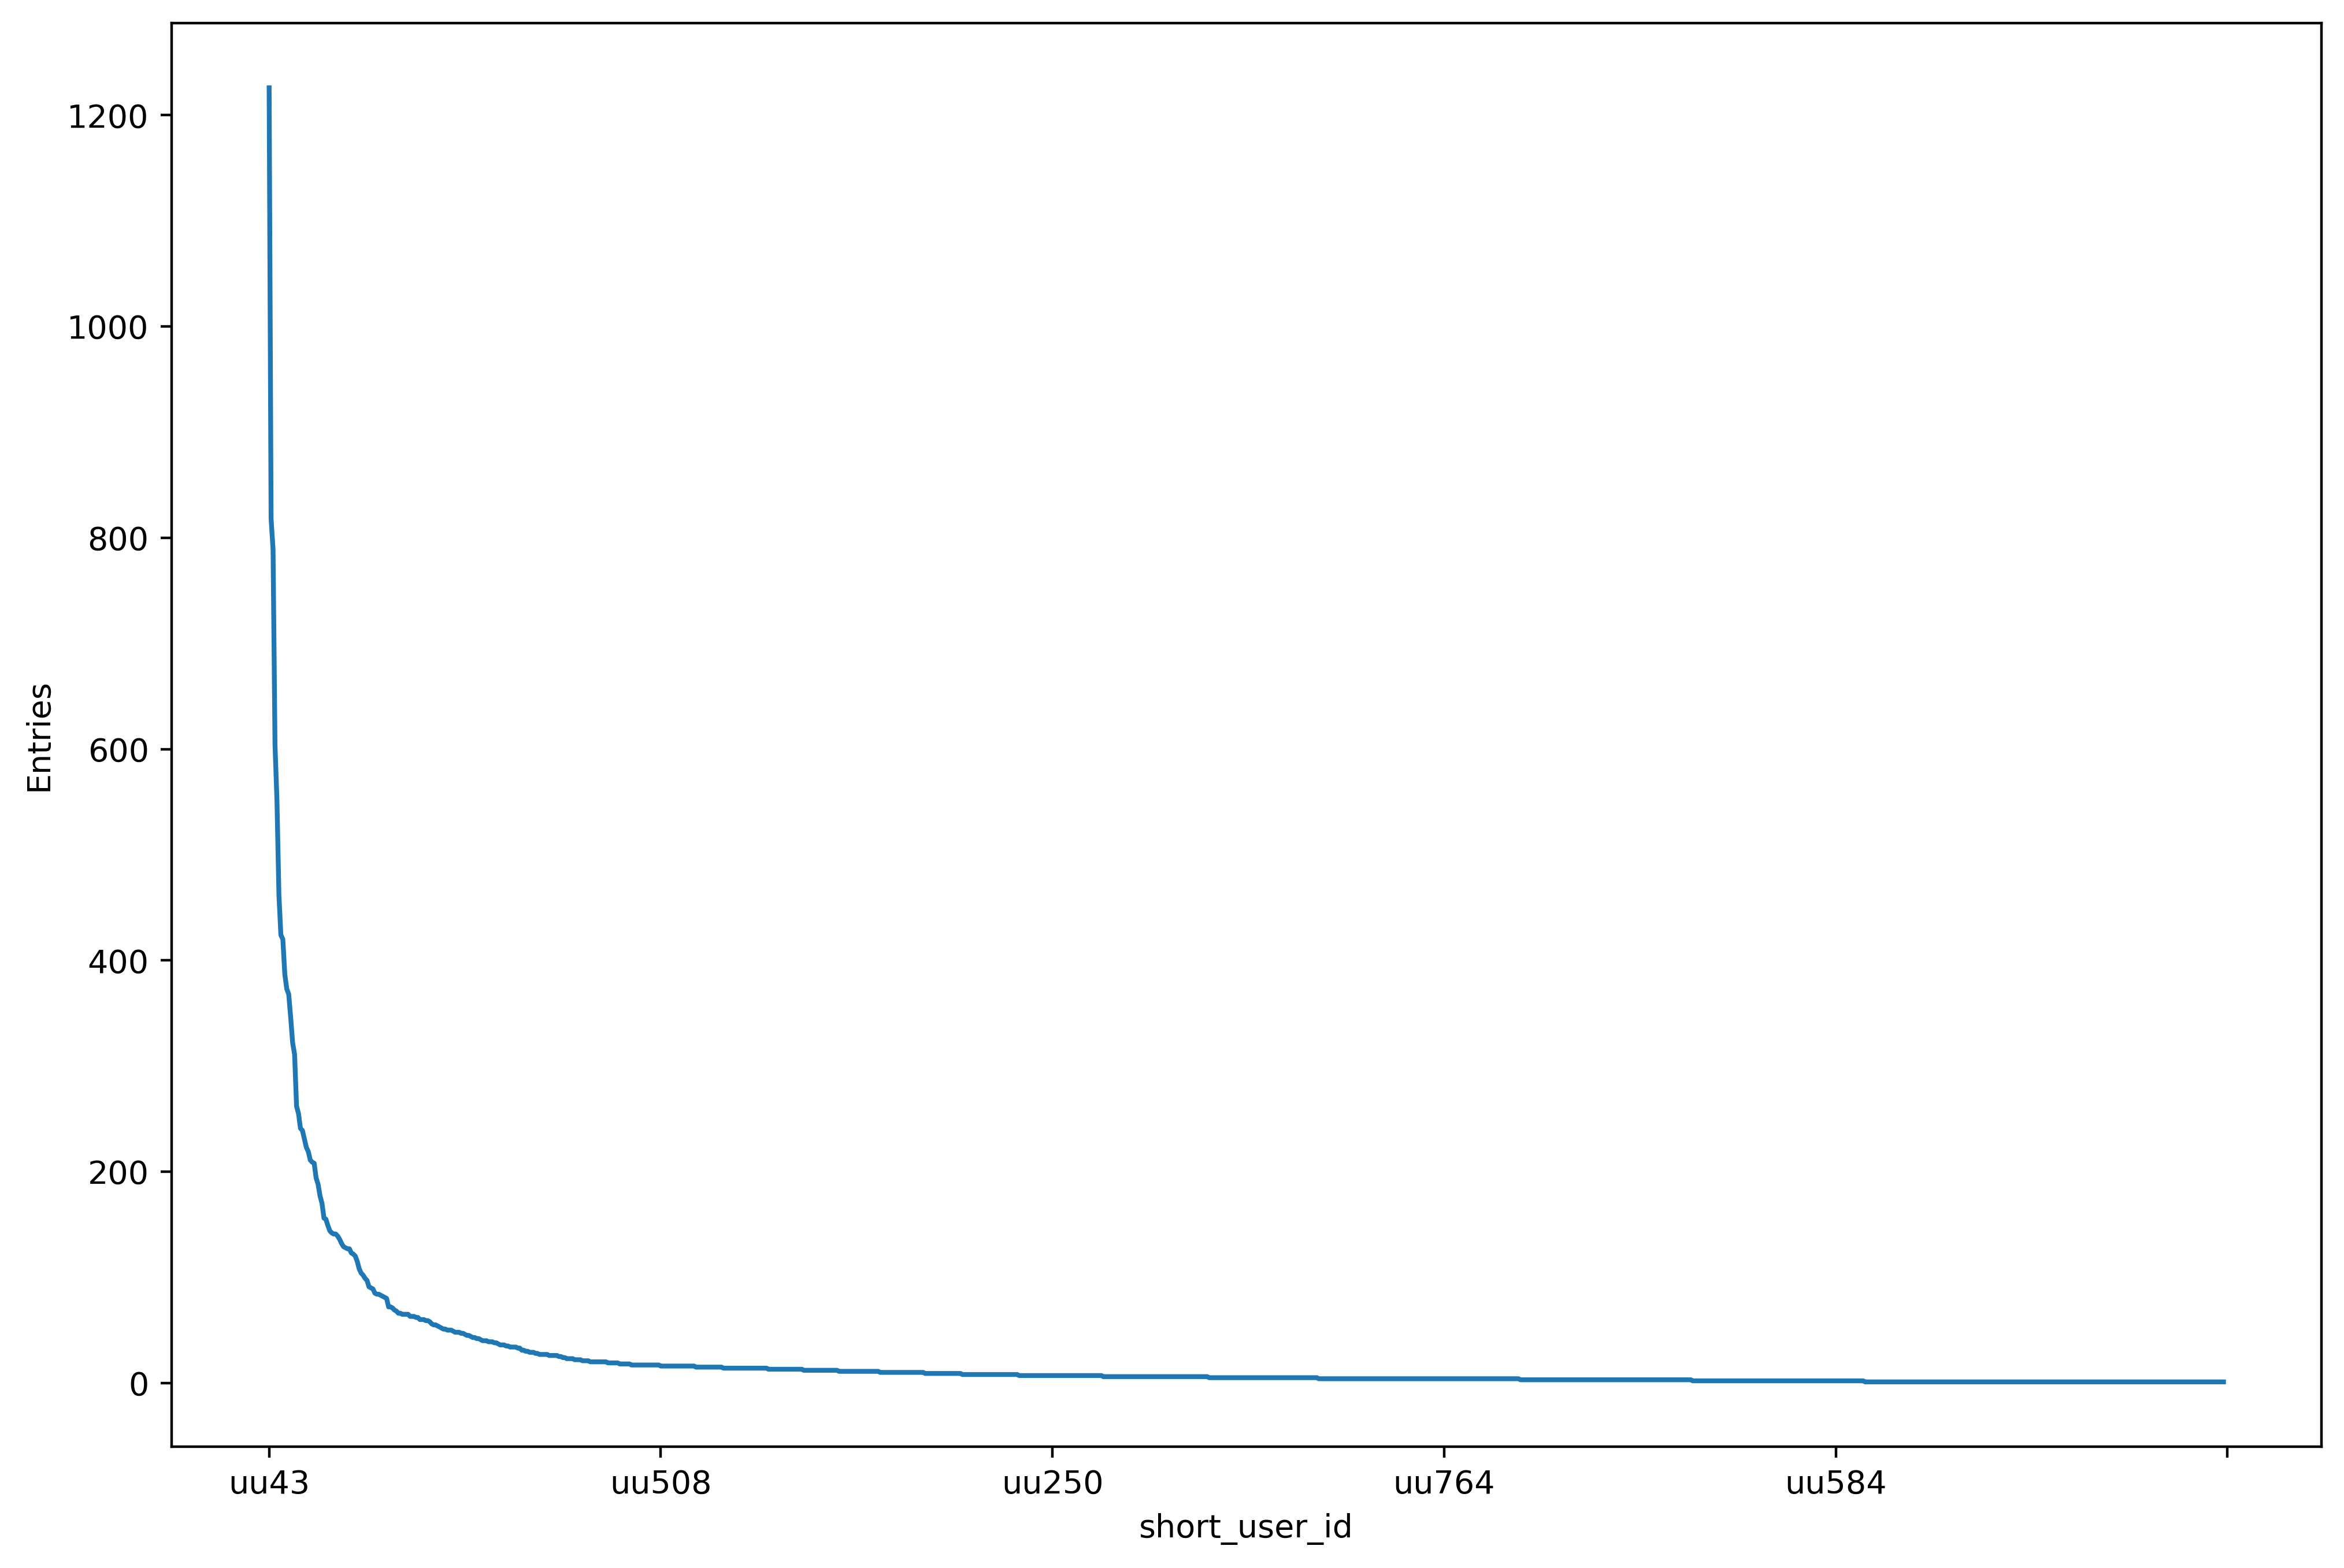

In [13]:
df['short_user_id'] = df['user_id'].str.replace(r'^uu0+', 'uu', regex=True)

user_id_count = df['short_user_id'].value_counts()
plt.figure(figsize=(12,8), dpi=400)

plt.xlabel('User ID')
plt.ylabel('Entries')


user_id_count.plot(kind='line')
plt.savefig('./presen/fig/userId.png')
plt.show()

## `log_date`

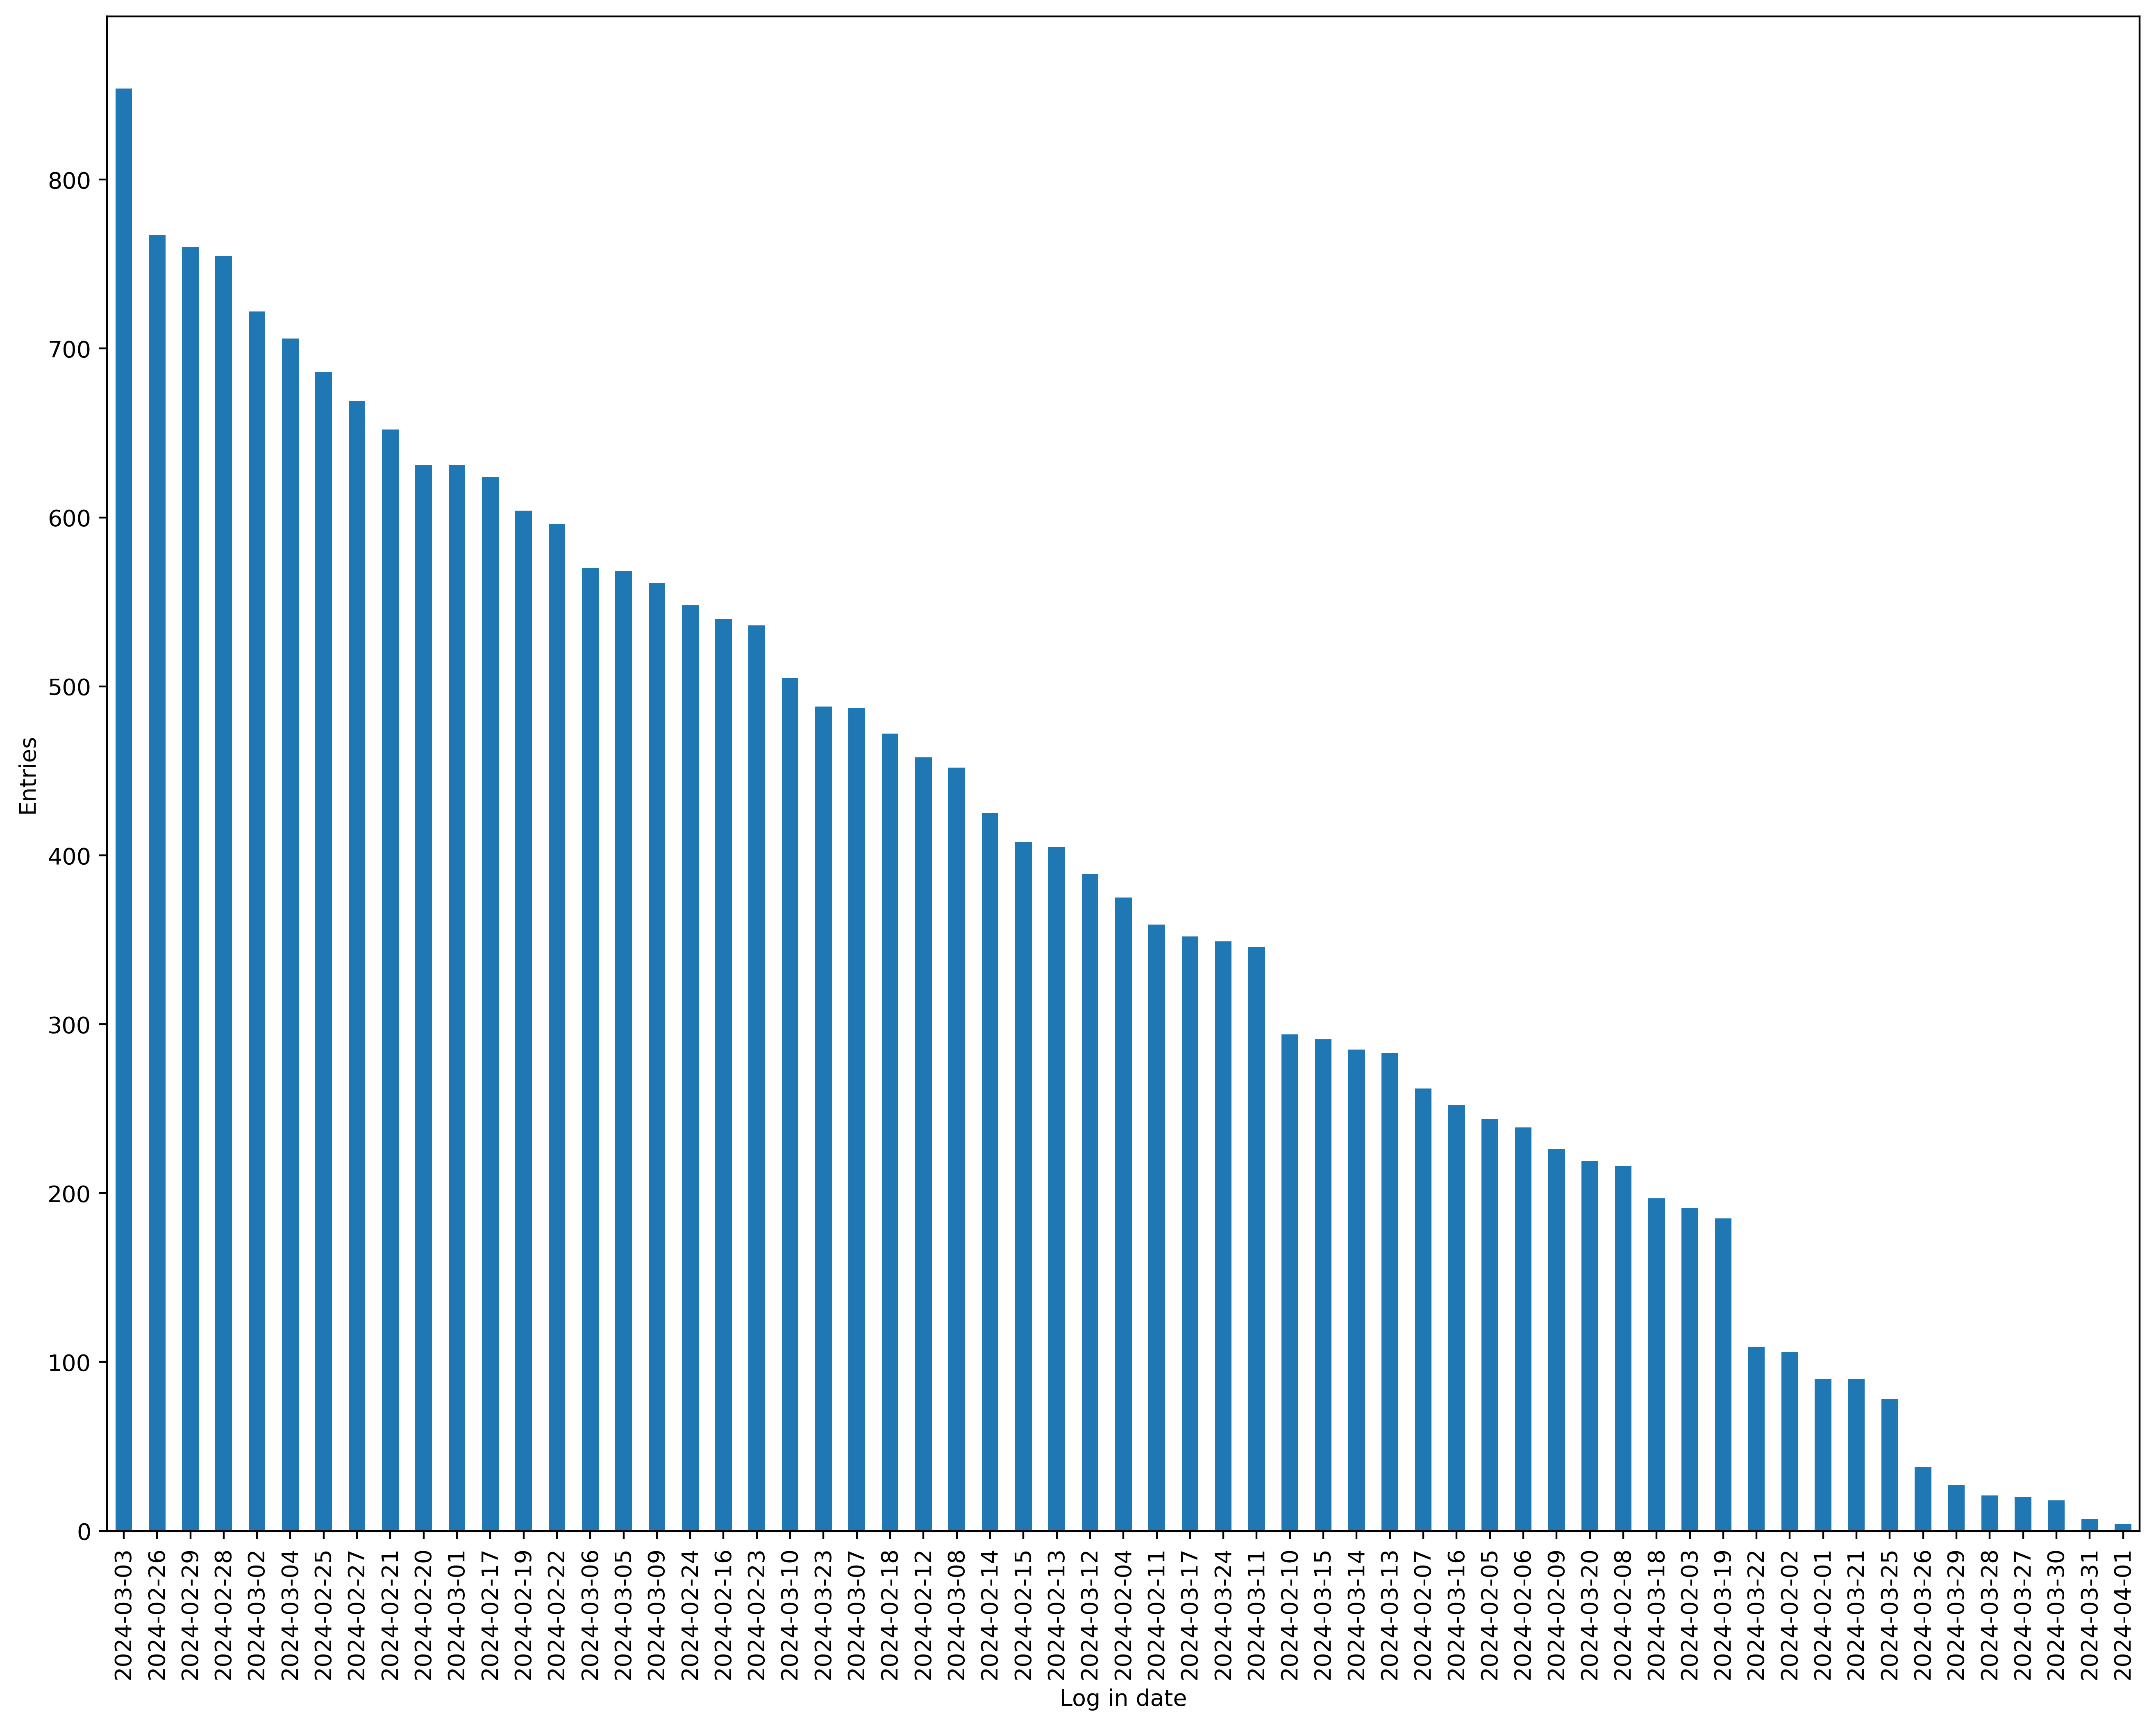

In [37]:
log_date_count = df['log_date'].value_counts()

plt.figure(figsize = (16, 12), dpi=400)
log_date_count.plot(kind='bar')

plt.xlabel('Log in date')
plt.ylabel('Entries')

plt.savefig('./presen/fig/logDate.png')

plt.show()

## `view_start_time`

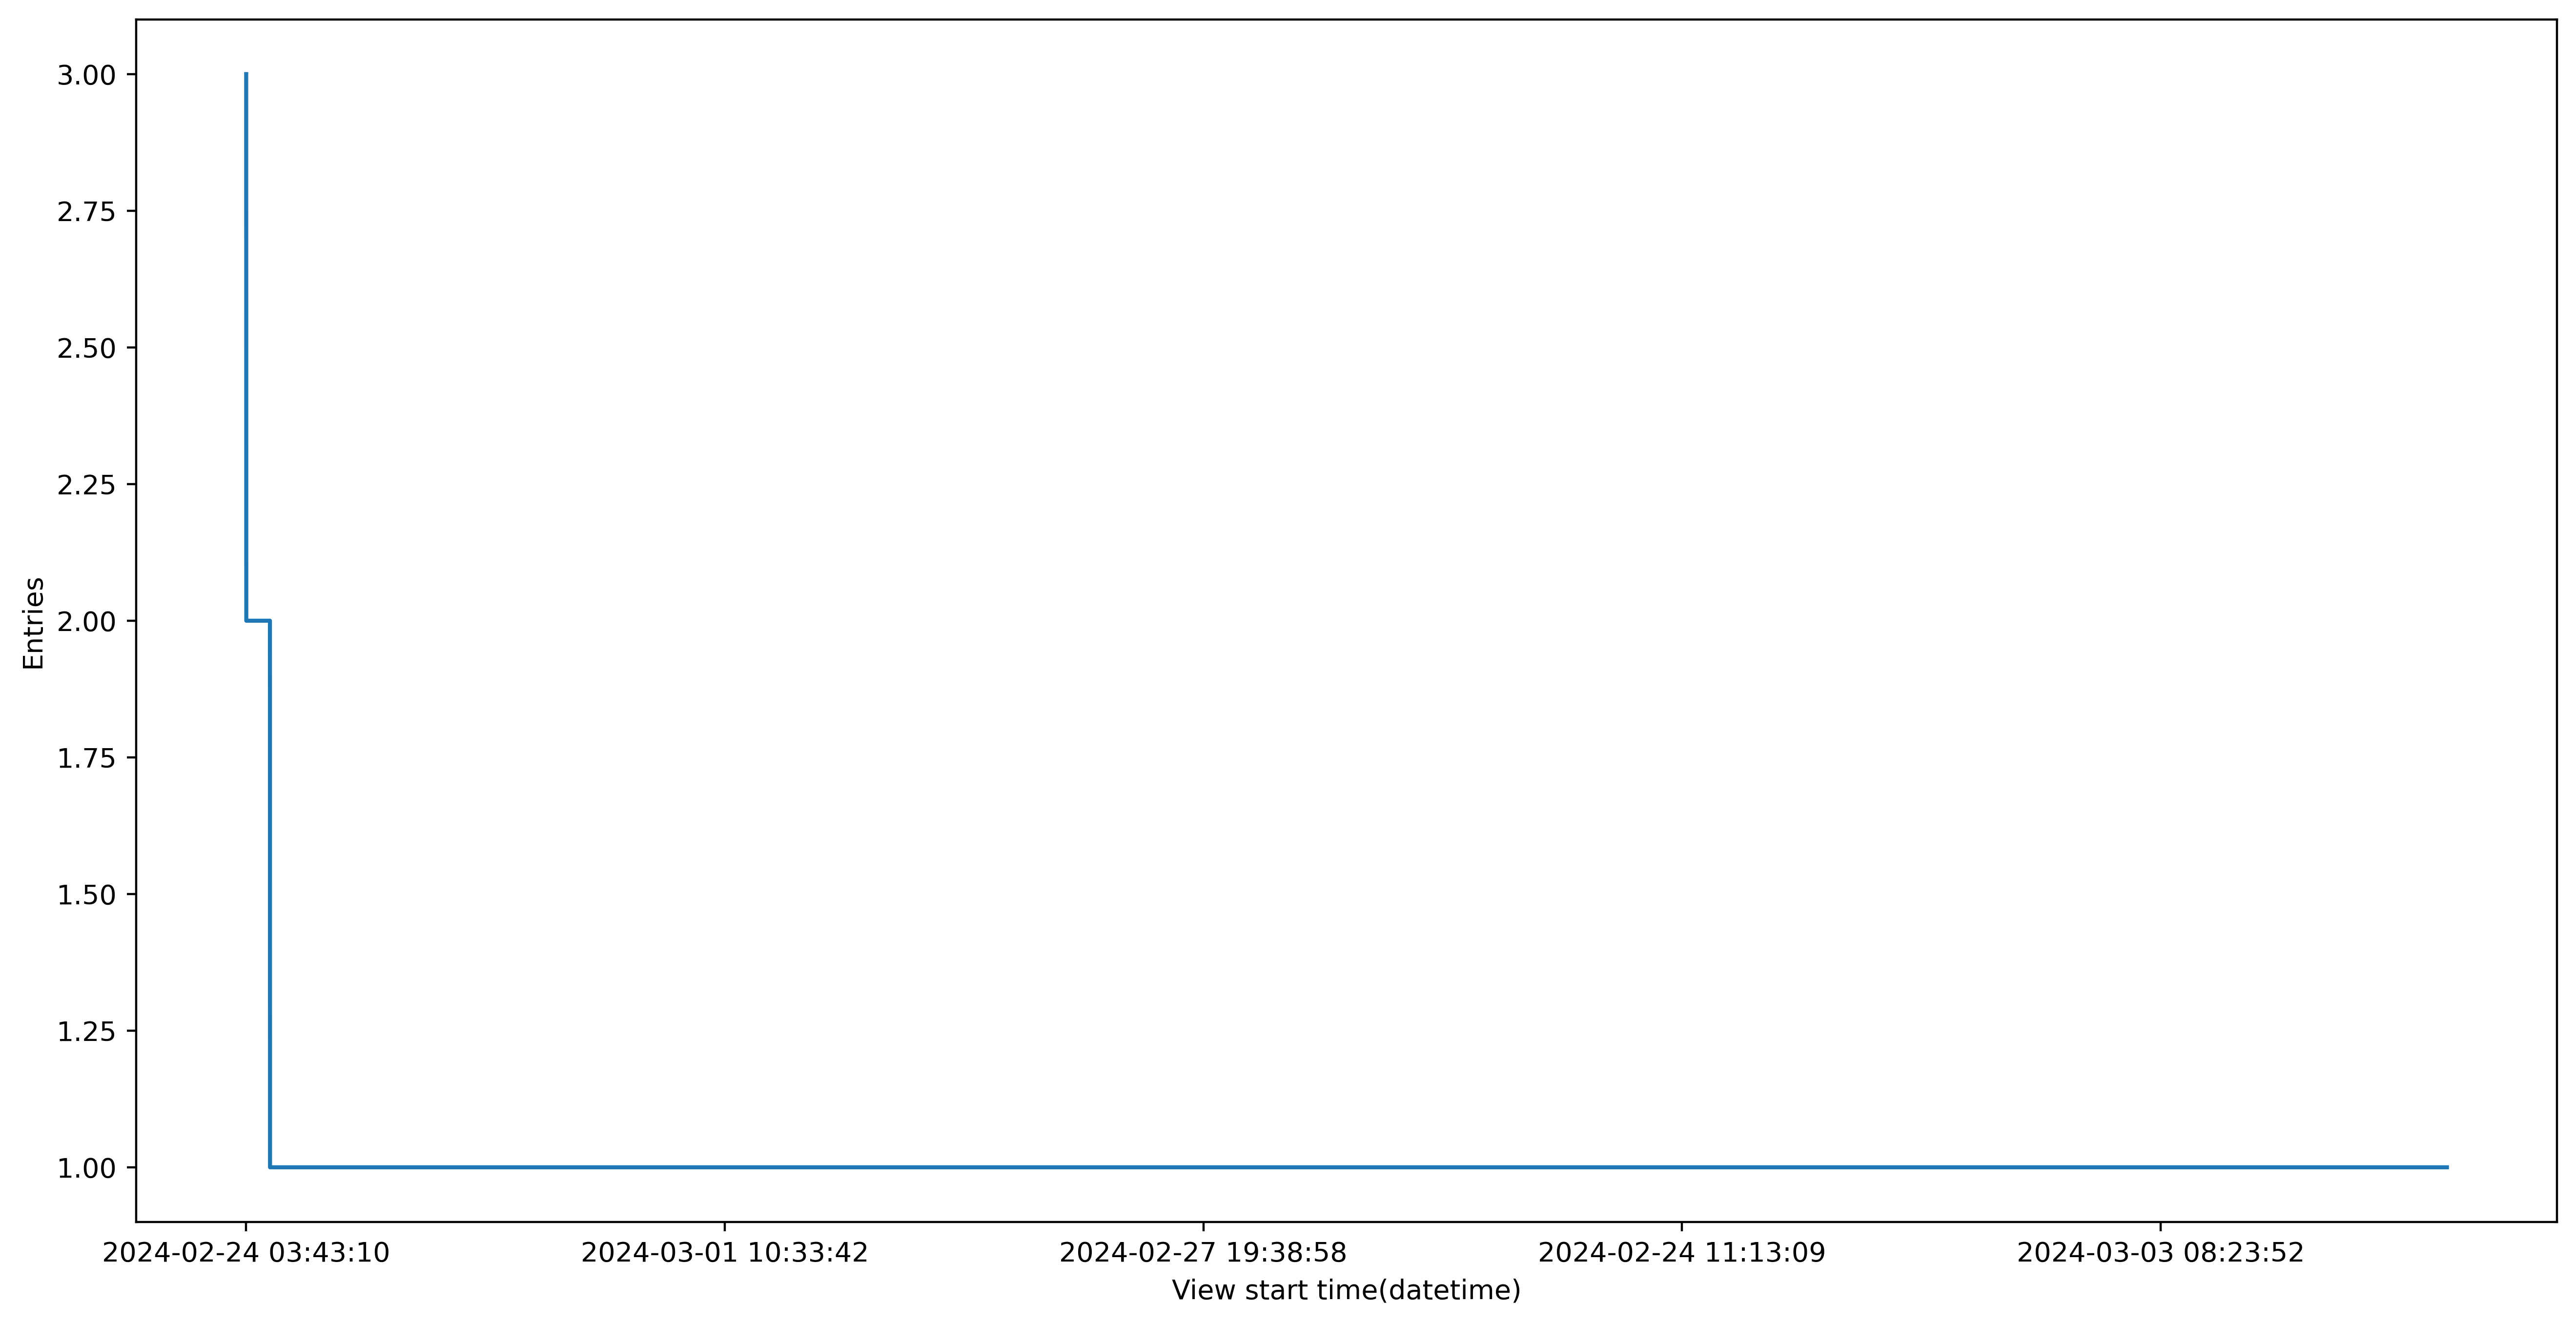

In [17]:
view_start_time_count = df['view_start_time'].value_counts()

plt.figure(figsize=(16,8),dpi=400)
view_start_time_count.plot(kind='line')

plt.xlabel('View start time(datetime)')
plt.ylabel('Entries')

plt.savefig('./presen/fig/viewStartTime.png')

plt.show()

## `view_end_time`

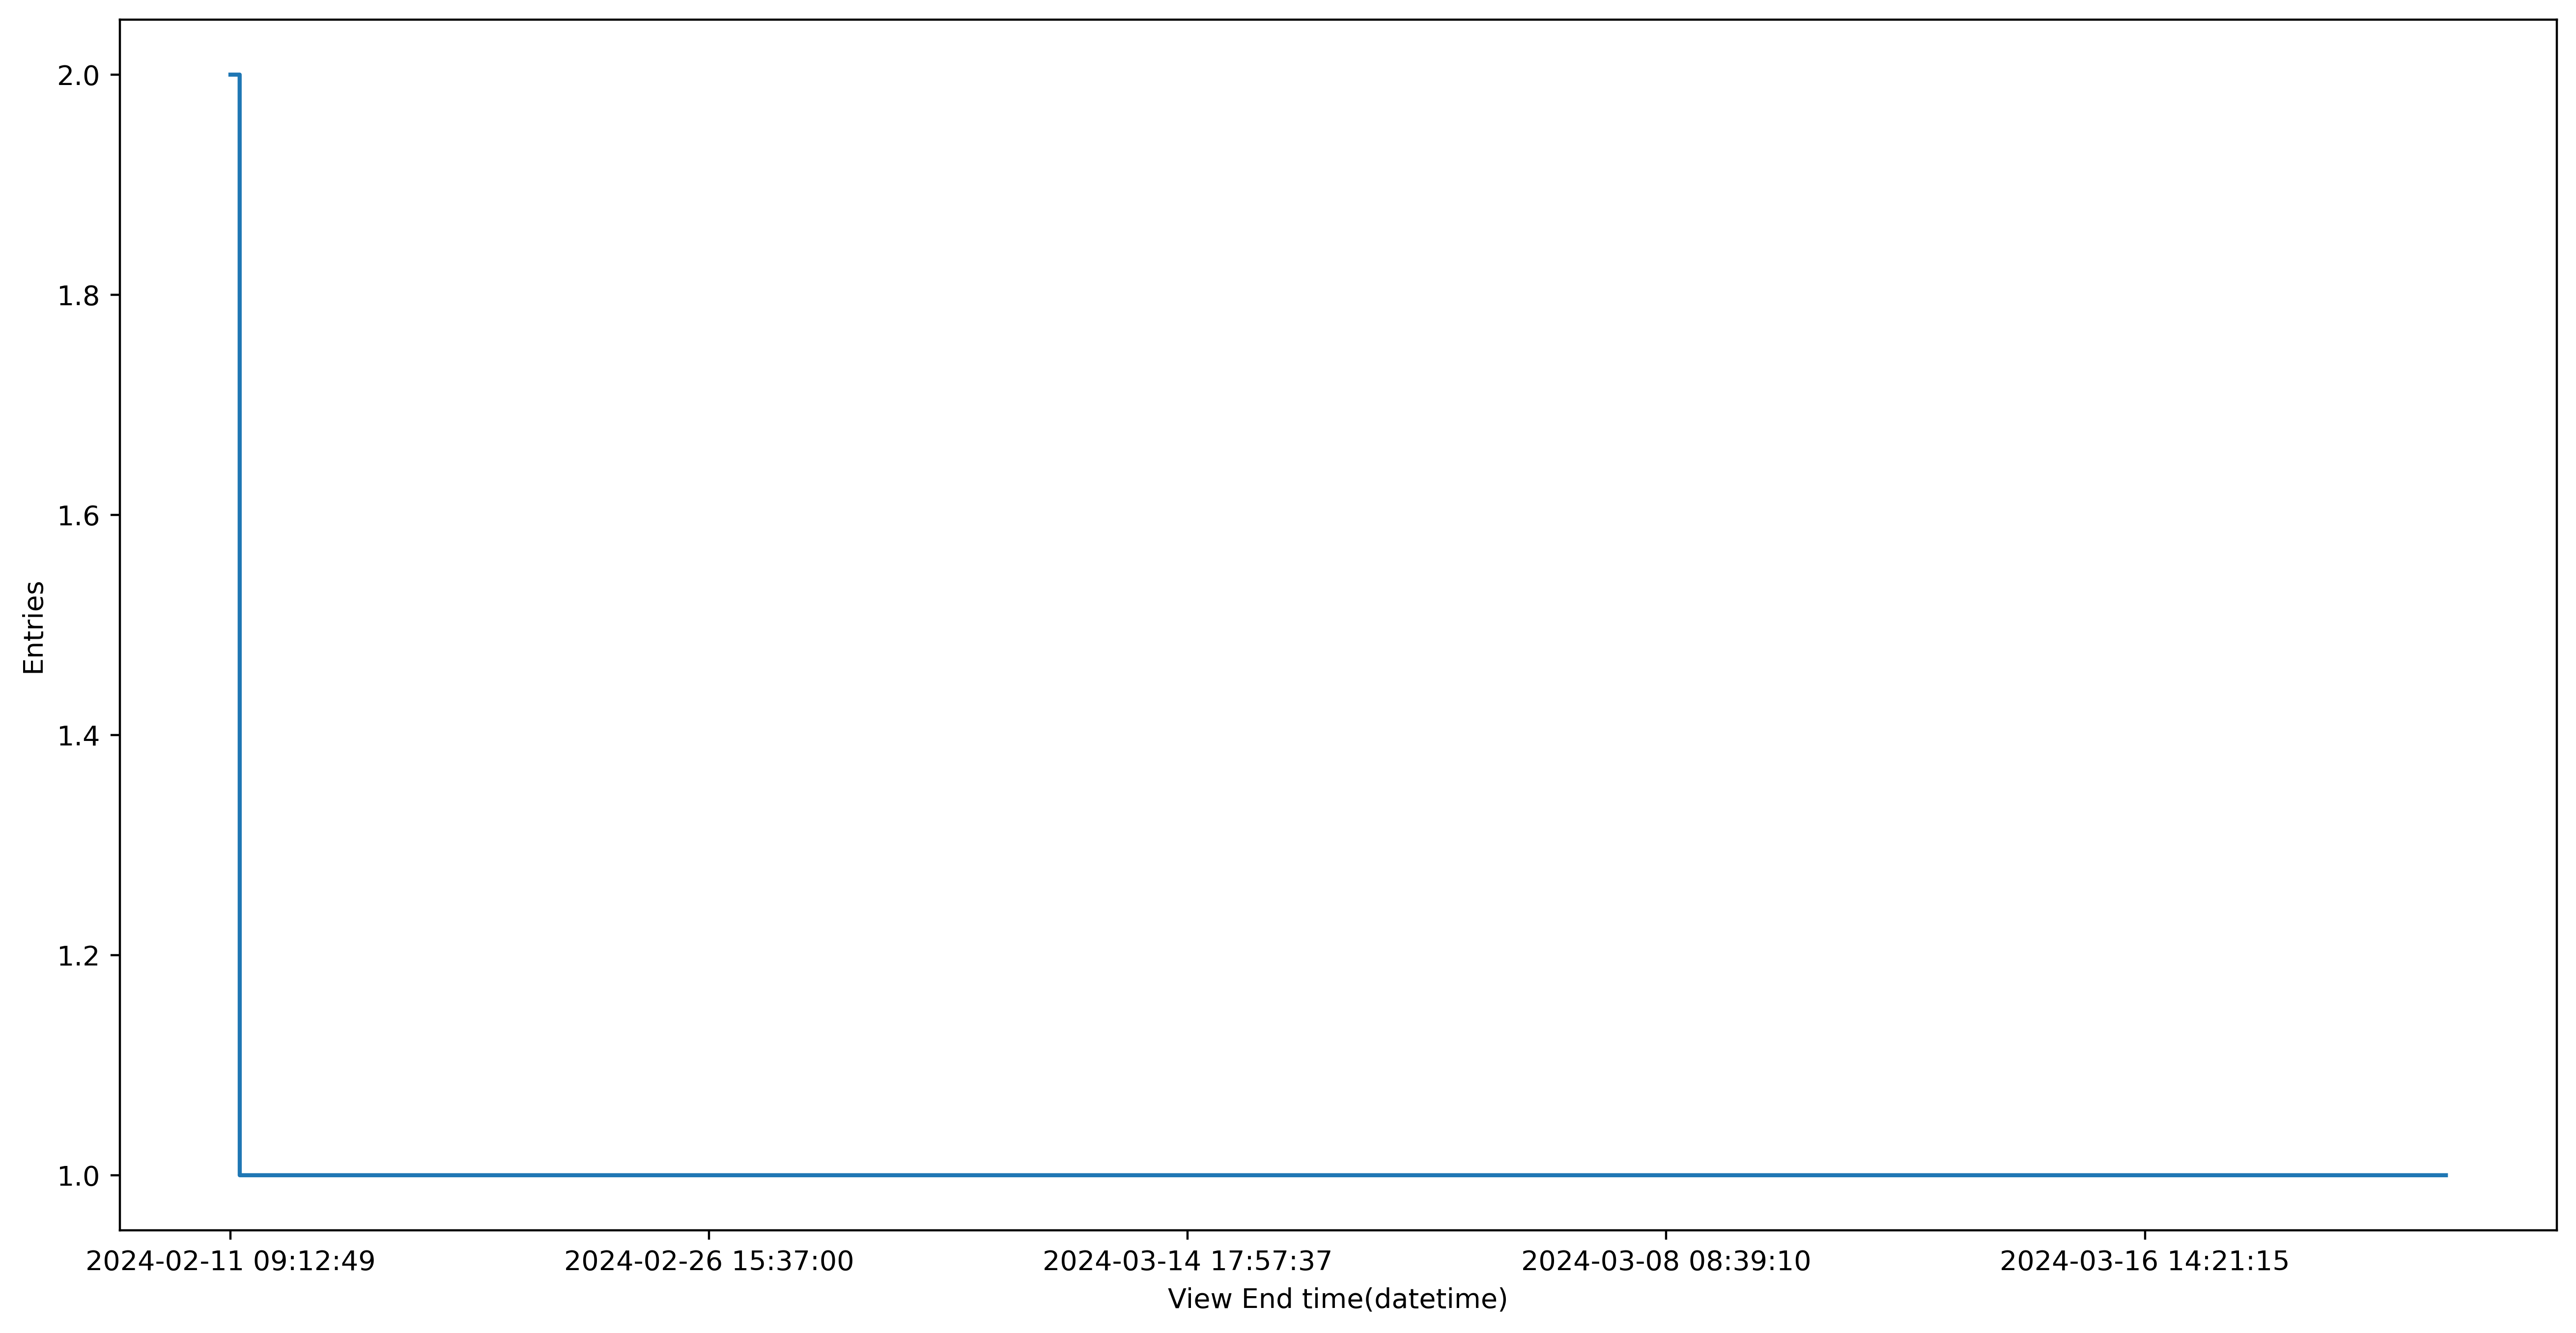

In [18]:
view_end_time_count = df['view_end_time'].value_counts()

plt.figure(figsize=(16,8), dpi=400)
view_end_time_count.plot(kind='line')


plt.xlabel('View End time(datetime)')
plt.ylabel('Entries')

plt.savefig('./presen/fig/viewEndTime.png')

plt.show()

In [20]:
df['view_start_time'] = pd.to_datetime(df['view_start_time'])
df['view_end_time'] = pd.to_datetime(df['view_end_time'])
df['view_duration'] = df['view_end_time'] - df['view_start_time']

In [21]:
df['view_duration']

0       0 days 00:00:14
1       0 days 00:01:06
2       0 days 00:01:03
3       0 days 00:01:21
4       0 days 00:00:29
              ...      
23237   0 days 00:03:27
23238   0 days 00:03:20
23239   0 days 00:02:57
23240   0 days 00:02:09
23241   0 days 00:02:51
Name: view_duration, Length: 23242, dtype: timedelta64[ns]

## `view_duration`

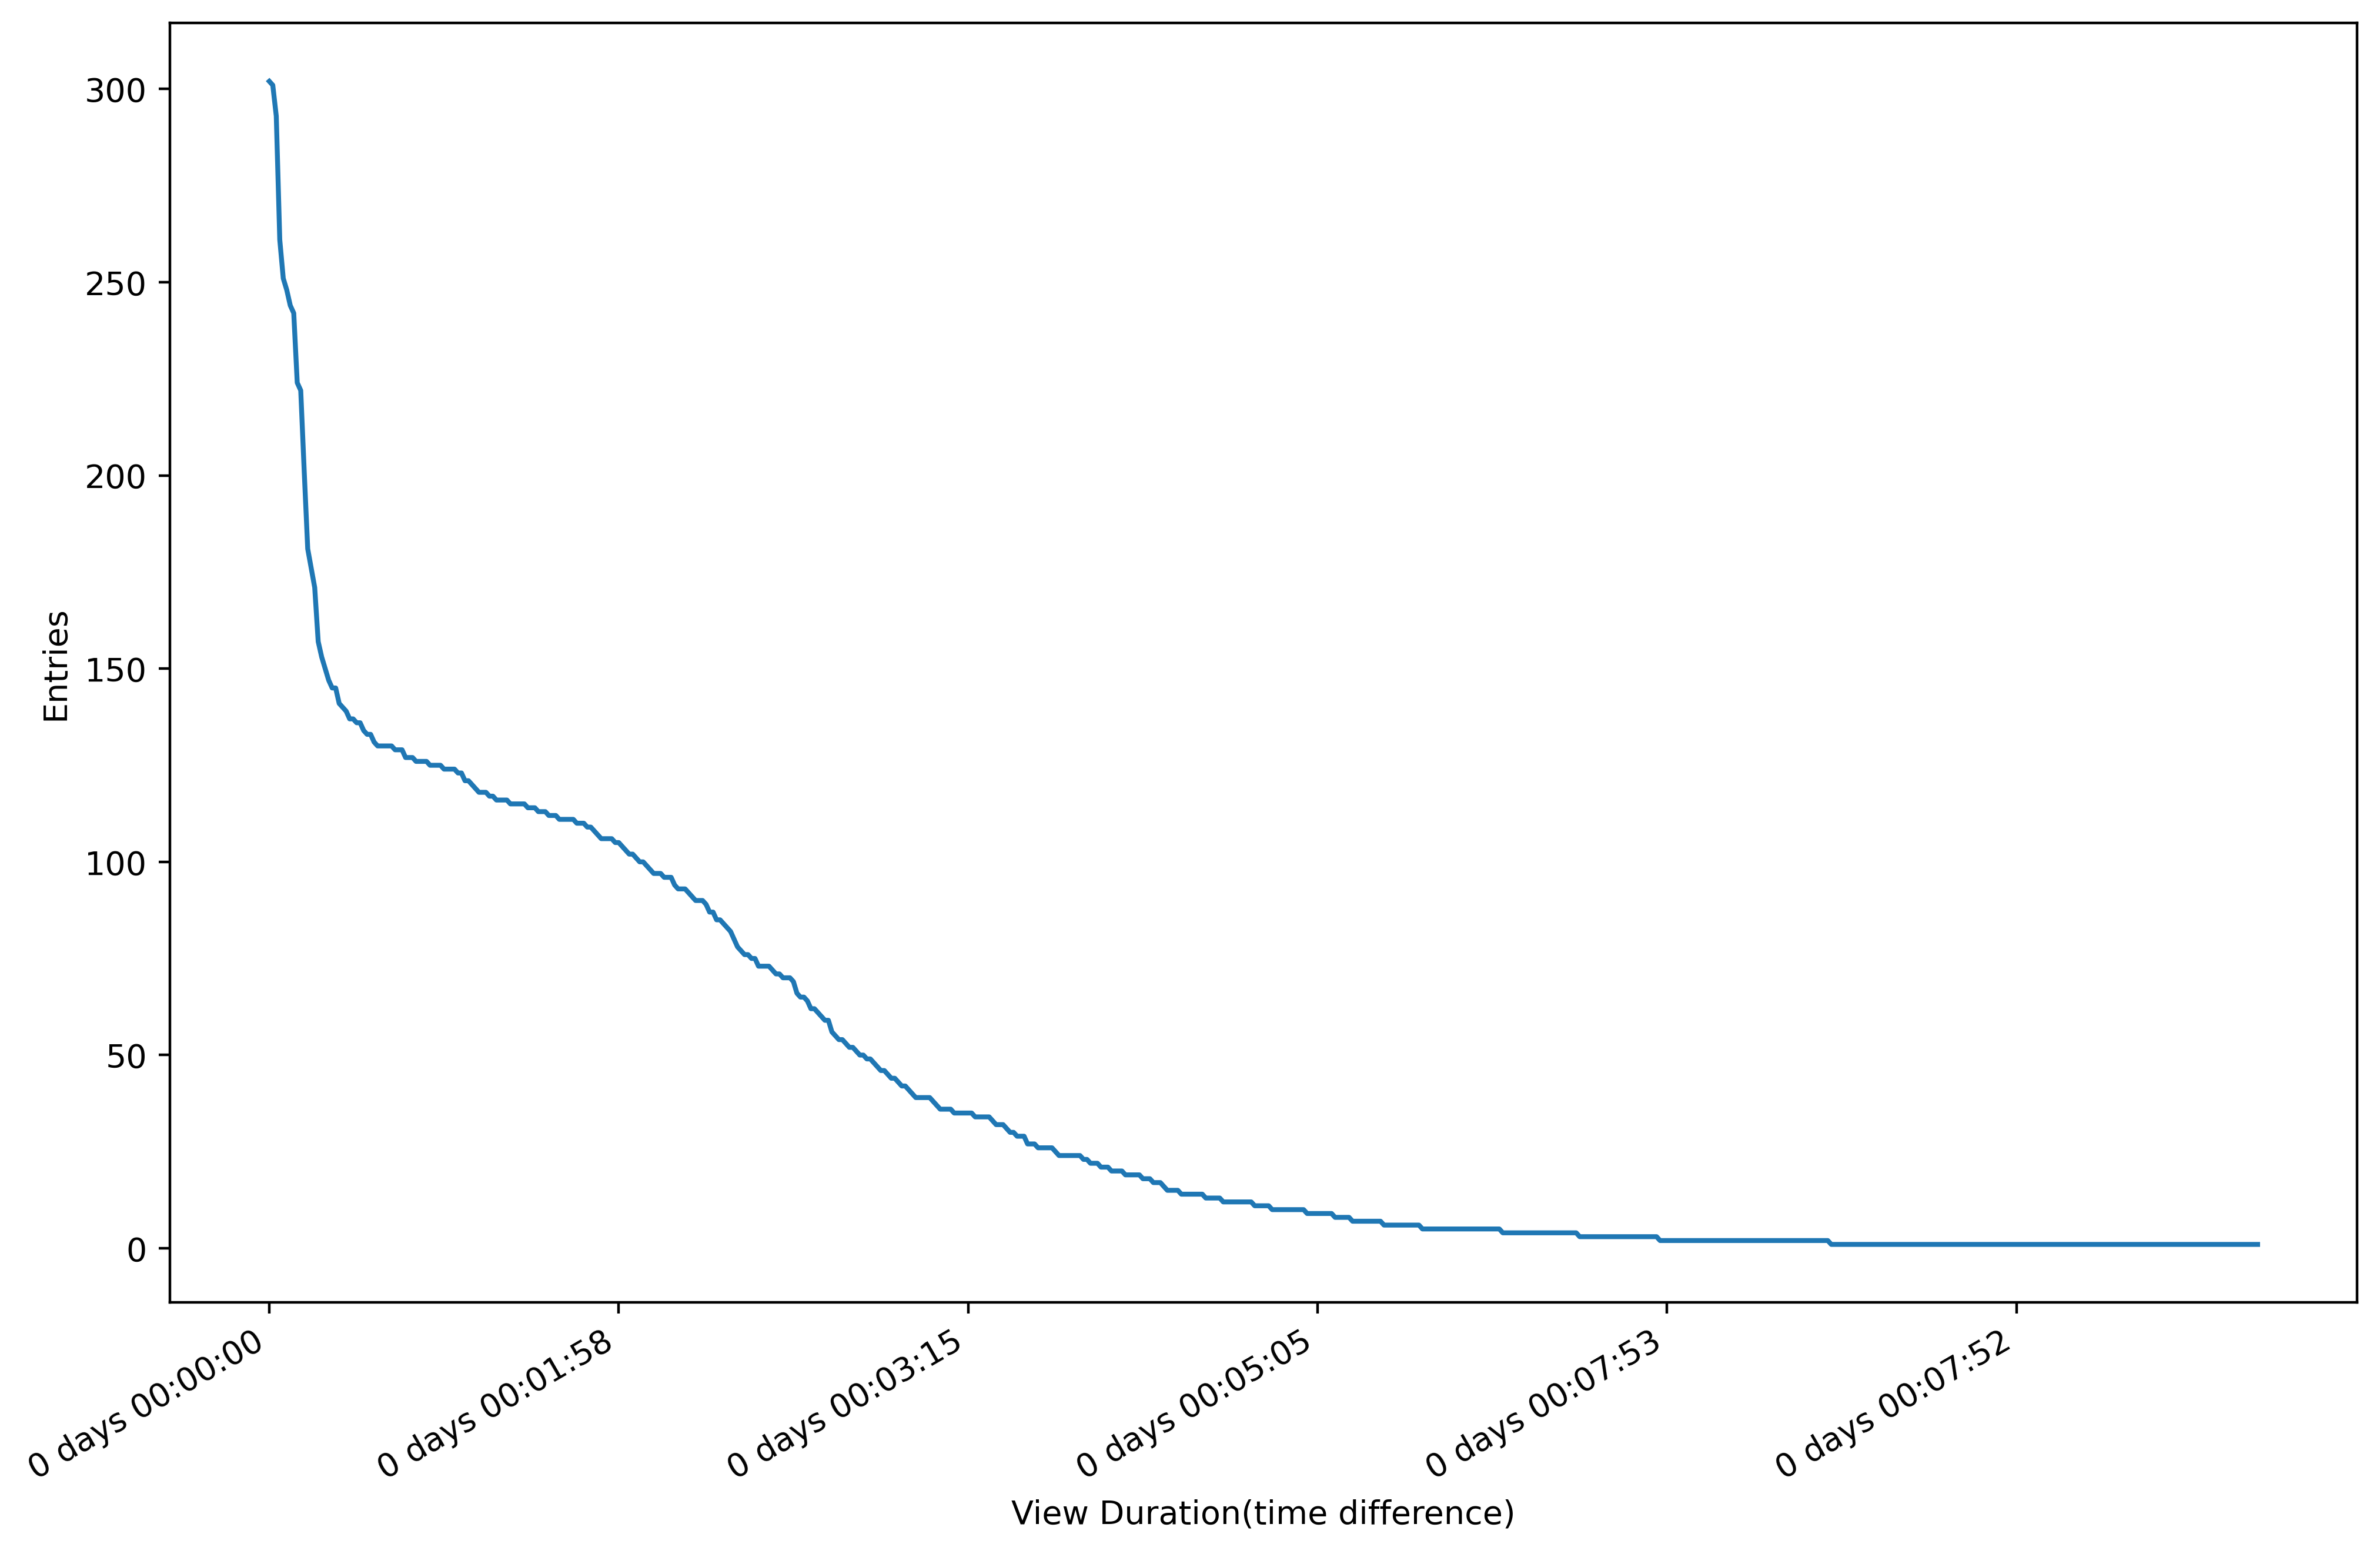

In [22]:
view_duration_count = df['view_duration'].value_counts()

plt.figure(figsize=(12,8), dpi = 400)

view_duration_count.plot(kind='line')

plt.xlabel('View Duration(time difference)')
plt.ylabel('Entries')

plt.savefig('./presen/fig/viewDuration.png')

## `view_percent`

In [38]:
df['view_percent_norm'] = df['view_percent']/df['log_day_sequence']

In [41]:
df['view_percent_norm'].max()

225.0

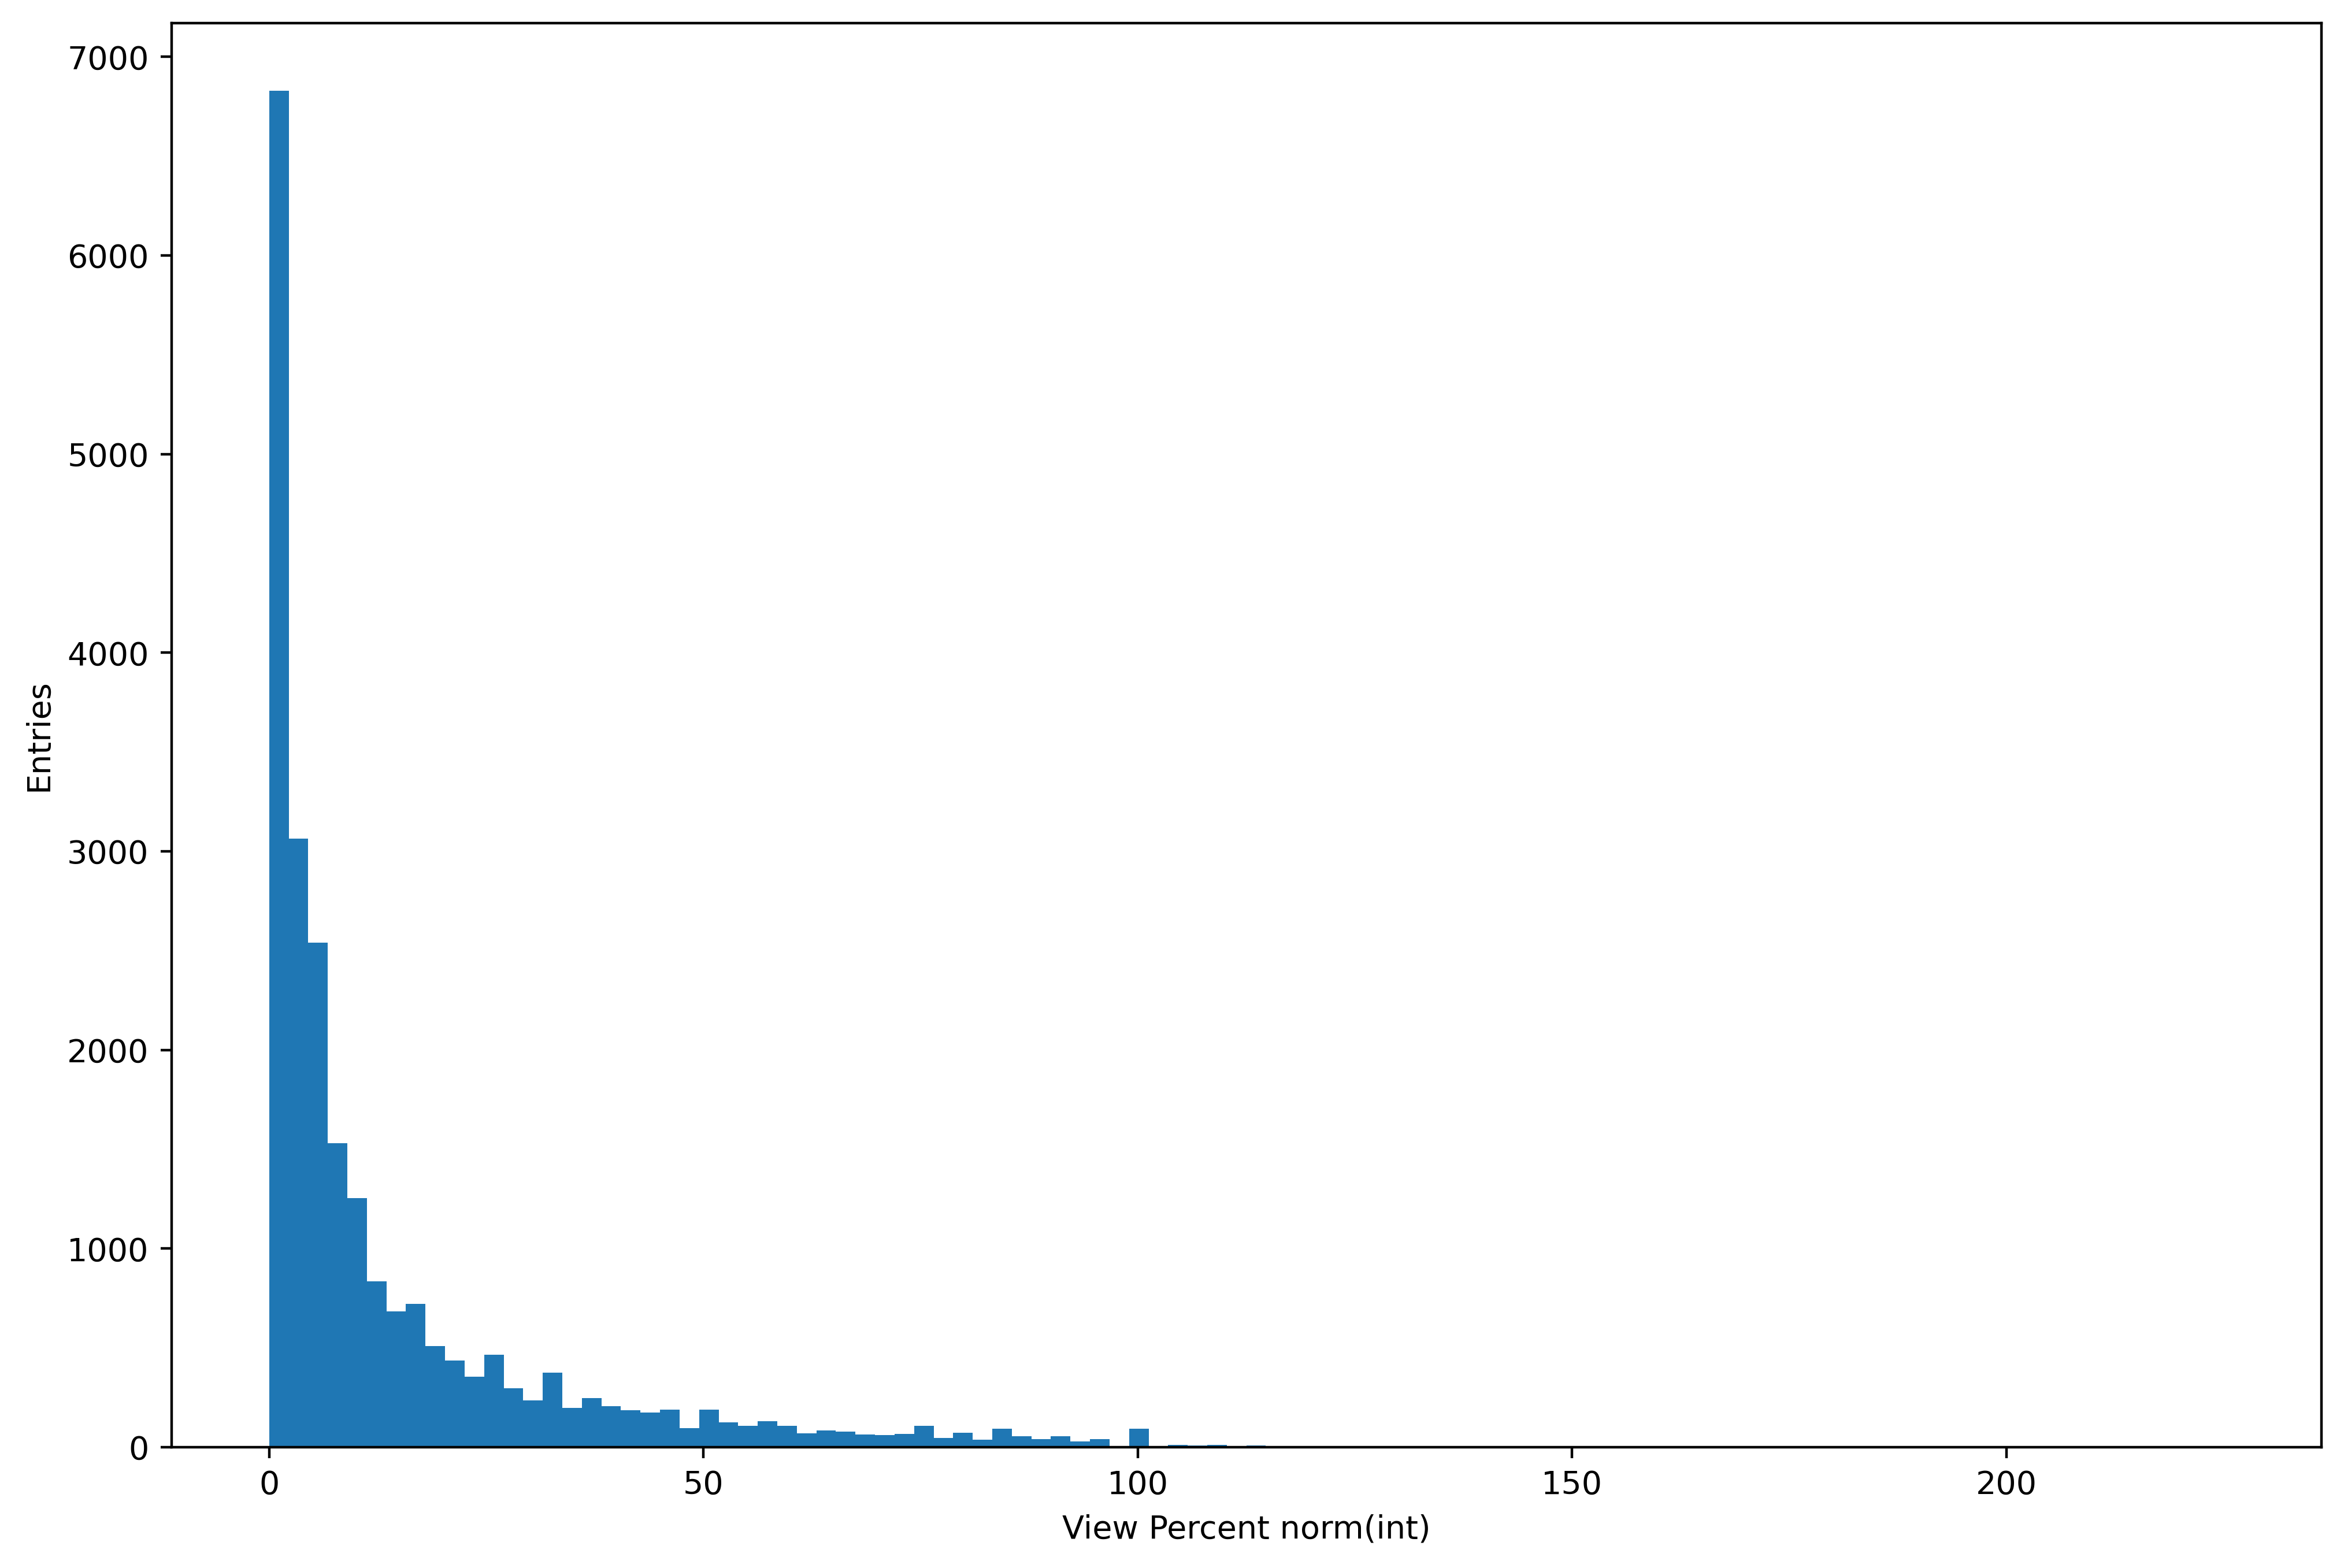

In [39]:
plt.figure(figsize=(12,8), dpi=400)

df['view_percent_norm'].plot(kind='hist', bins = 100)

plt.xlabel('View Percent norm(int)')
plt.ylabel('Entries')

plt.savefig('./presen/fig/viewPercentNorm.png')

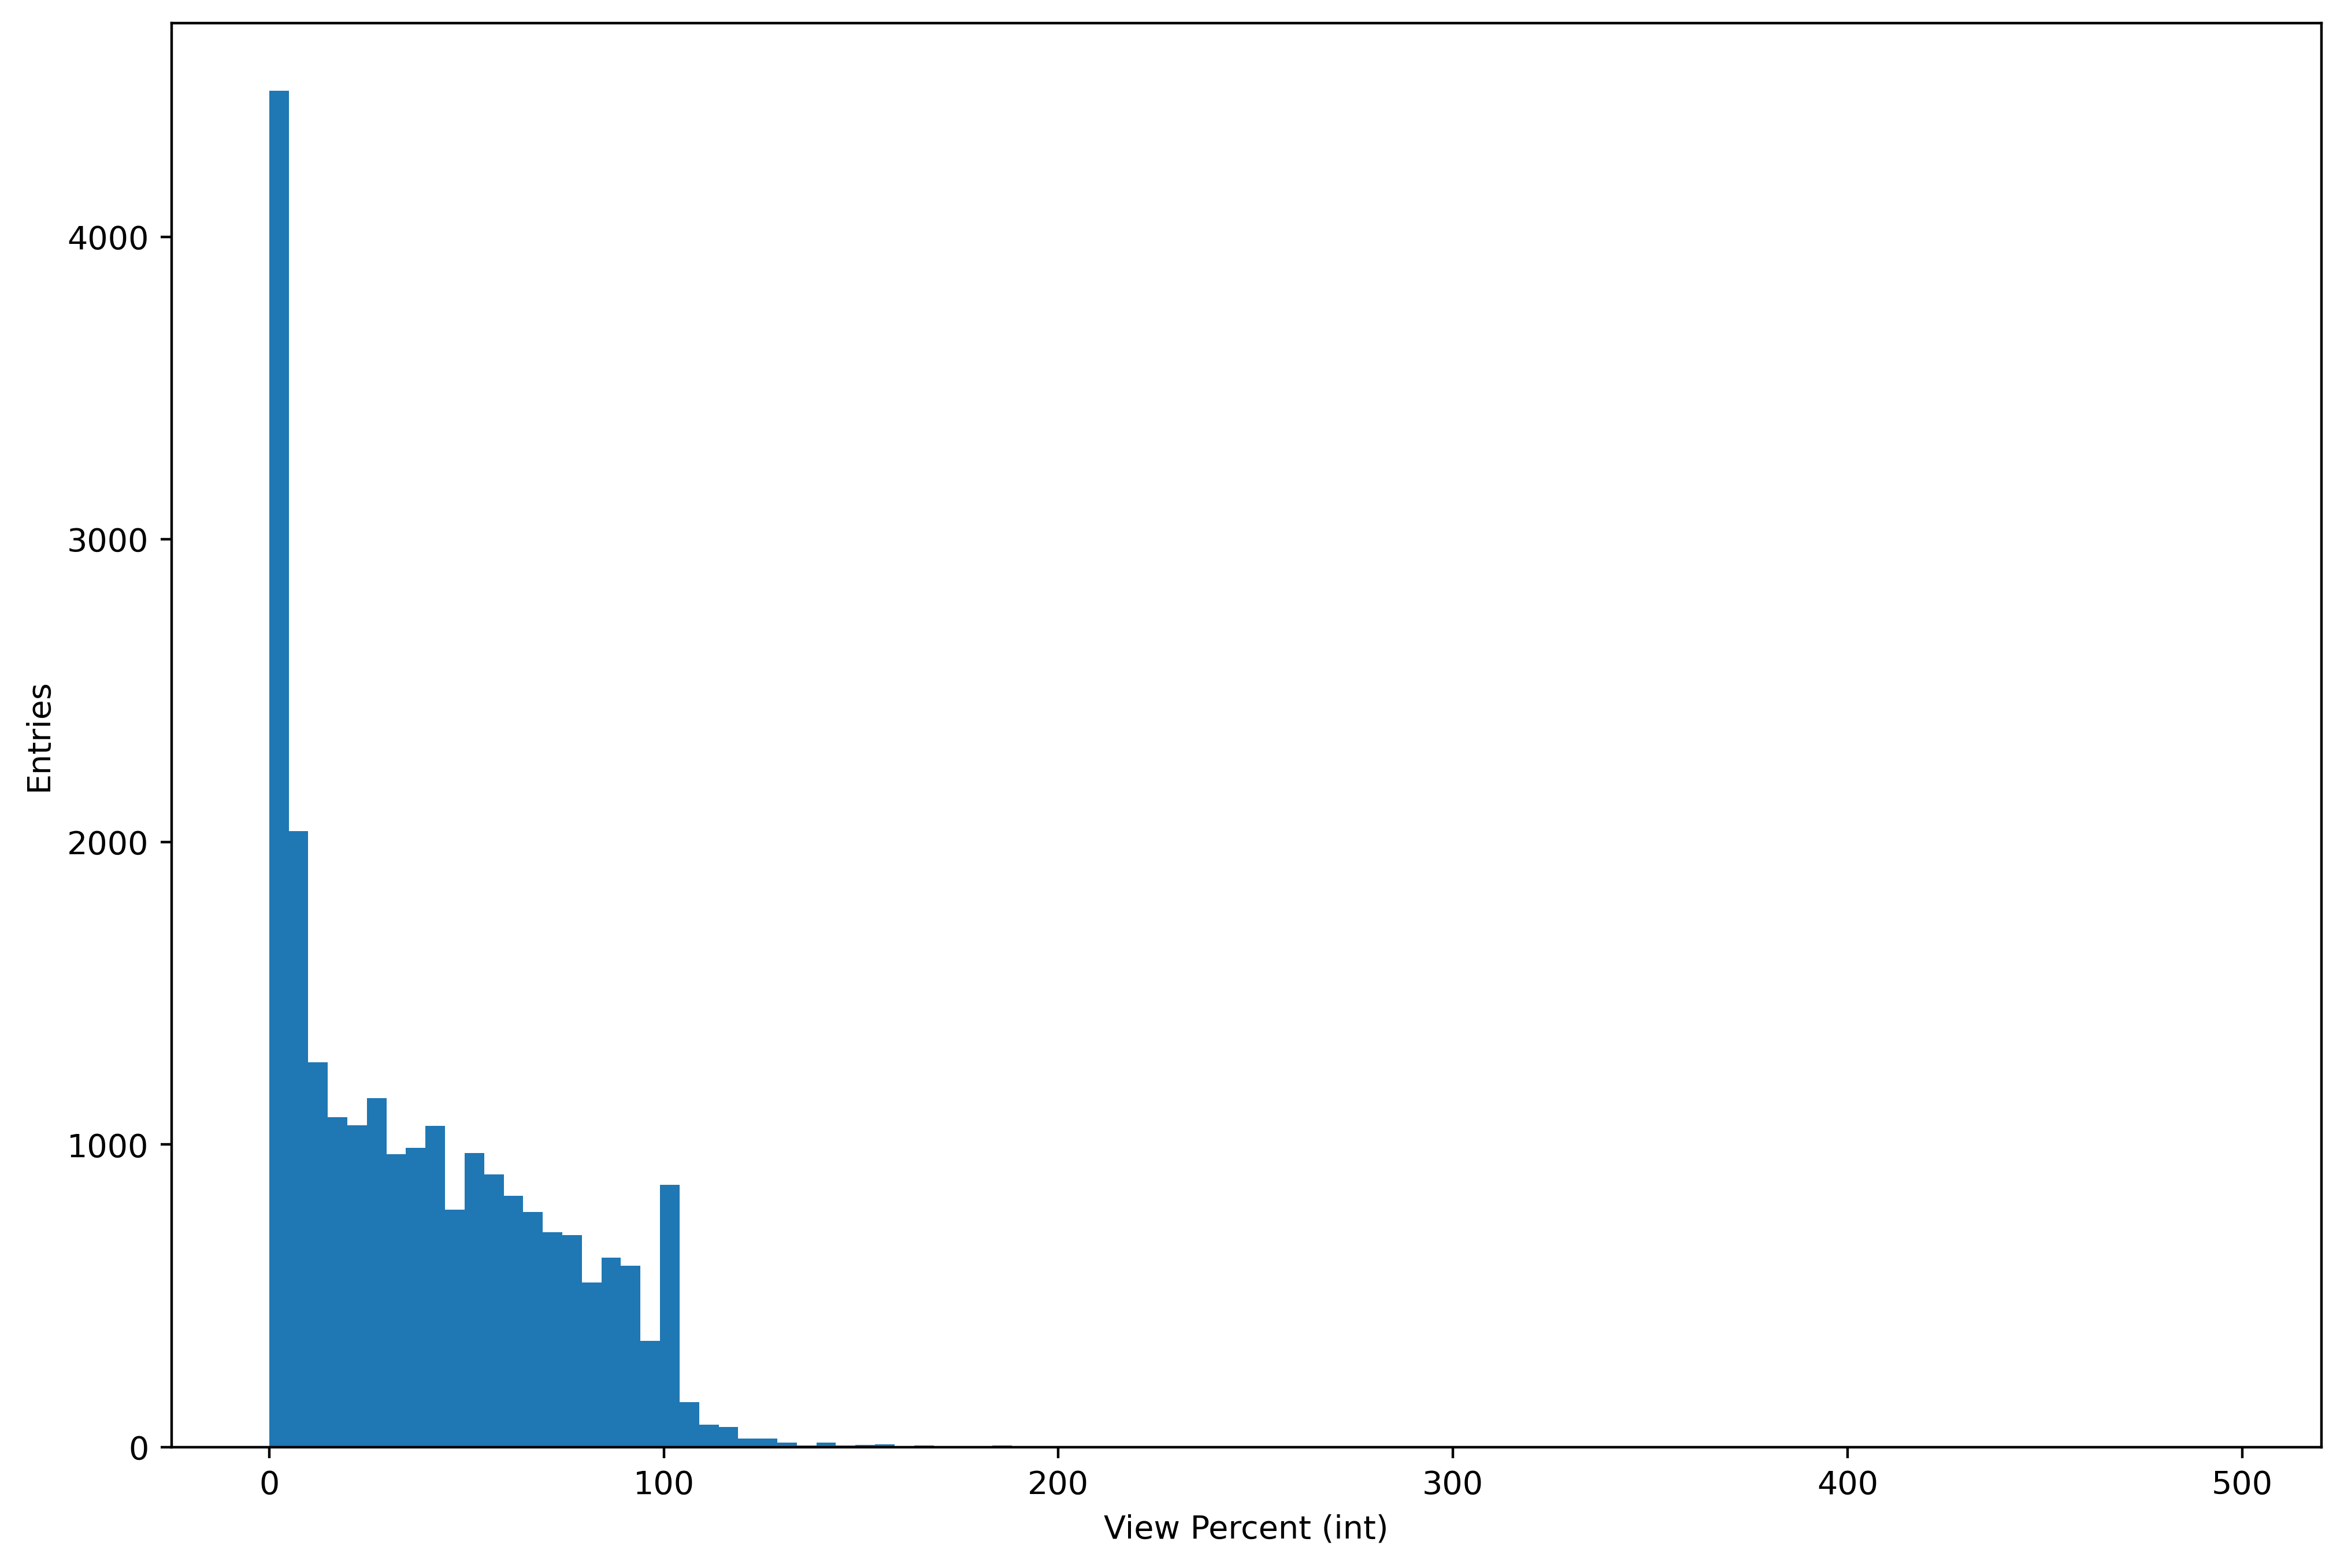

In [30]:
plt.figure(figsize=(12,8), dpi=400)

df['view_percent'].plot(kind='hist', bins = 100)

plt.xlabel('View Percent (int)')
plt.ylabel('Entries')

plt.savefig('./presen/fig/viewPercent.png')

## `log_day_sequence`

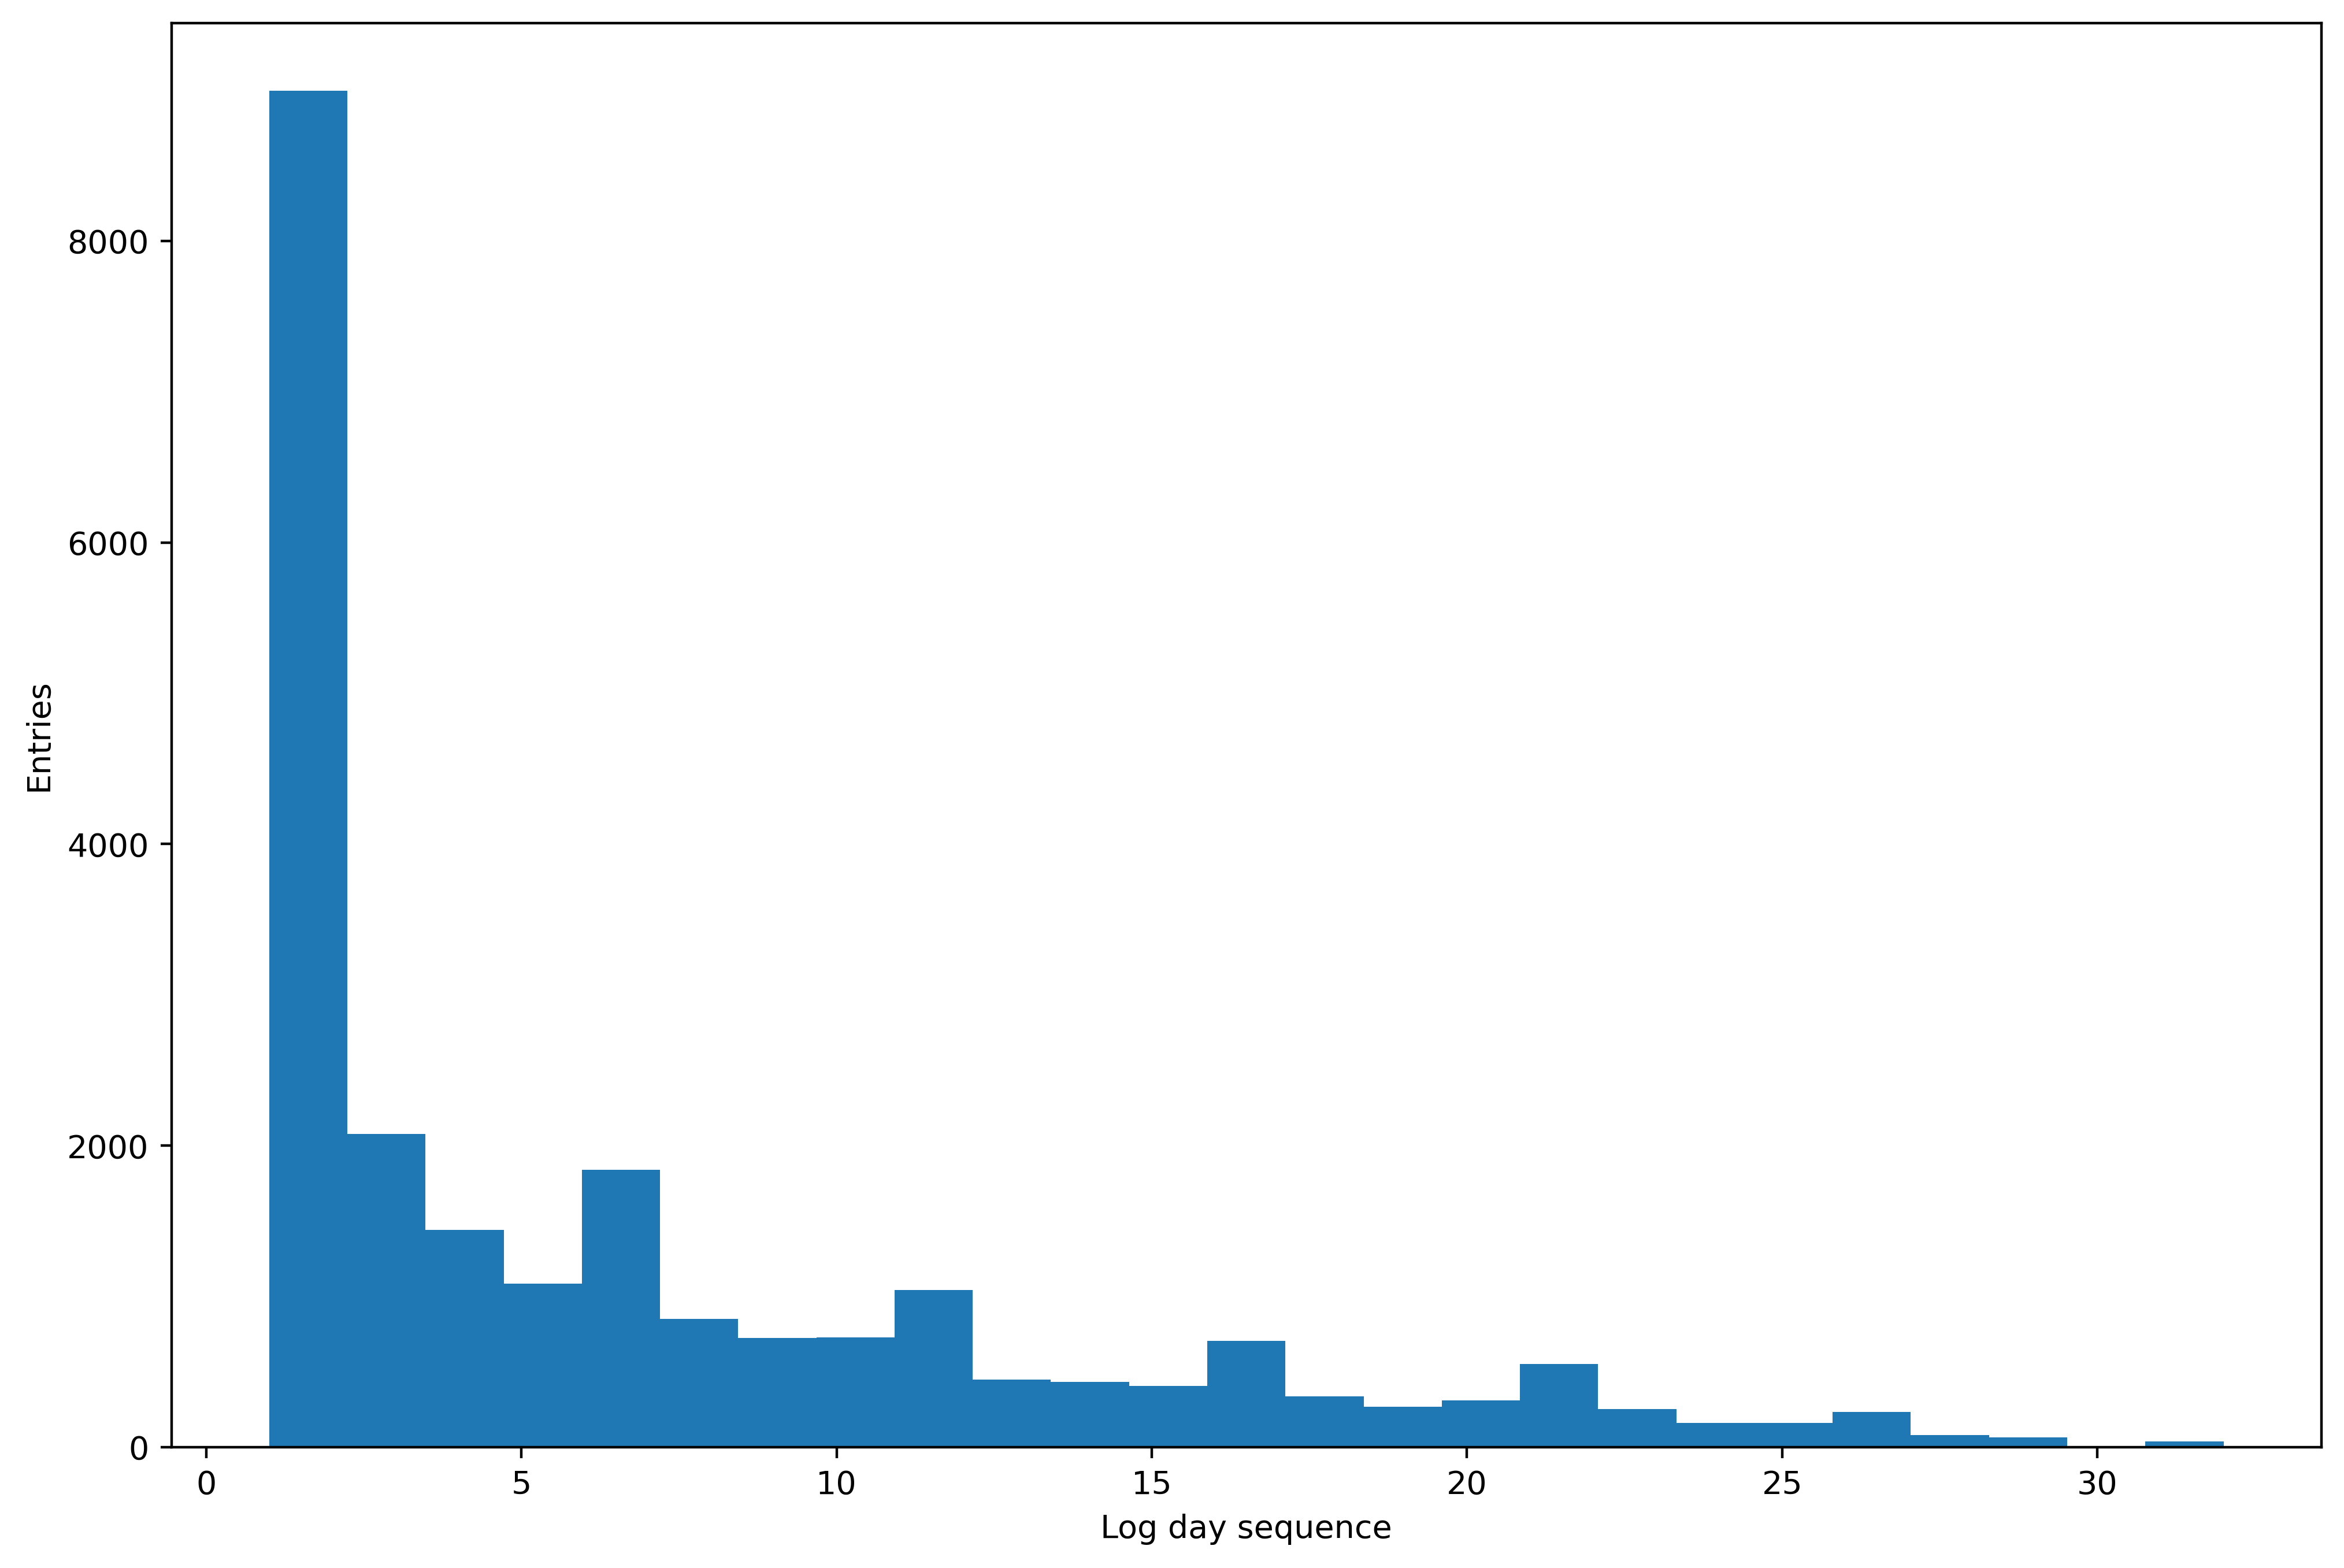

In [31]:
plt.figure(figsize=(12,8), dpi=400)

df['log_day_sequence'].plot(kind='hist', bins = 25)


plt.xlabel('Log day sequence')
plt.ylabel('Entries')

plt.savefig('./presen/fig/logDaySeq.png')


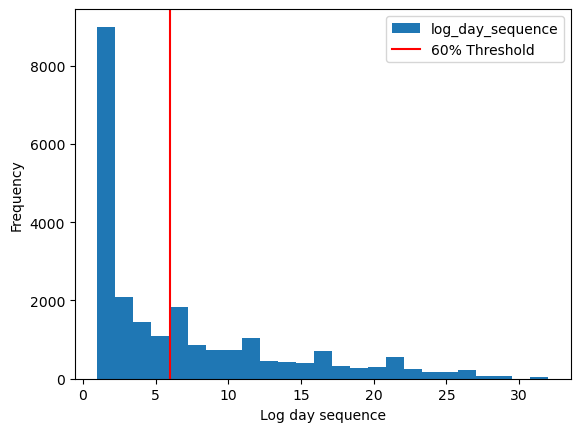

In [38]:
df['log_day_sequence'].plot(kind='hist', bins = 25)

threshold = np.percentile(df['log_day_sequence'], 60)

plt.axvline(threshold, color = 'red', linestyle = '-', label='60% Threshold')
plt.xlabel('Log day sequence')
plt.legend()

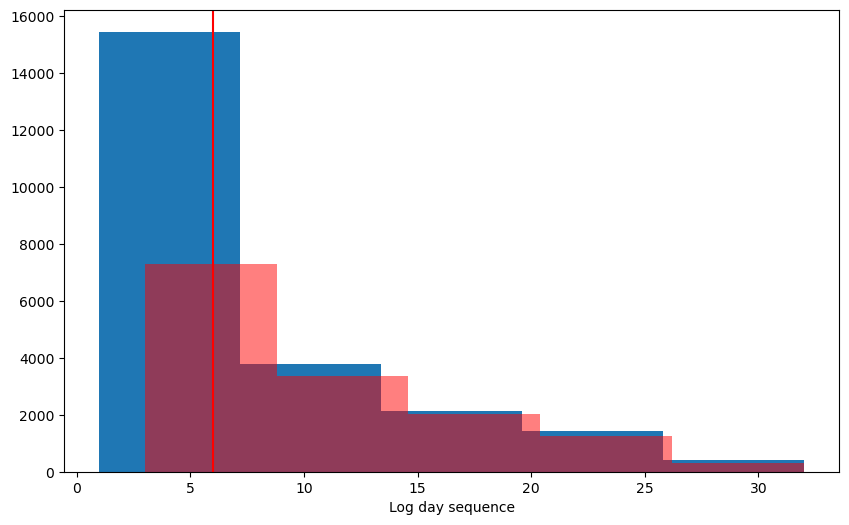

In [52]:
plt.figure(figsize=(10,6))

plt.axvline(threshold, color = 'red', linestyle = '-', label='60% Threshold')
plt.hist(df['log_day_sequence'], bins = 5)
plt.hist(df.loc[df['log_day_sequence'] > 2, 'log_day_sequence'], bins = 5, color='red', alpha=0.5)
plt.xlabel('Log day sequence')

plt.show()

## After Checking all variables

* How to find the content that is most popular?
* Is it relevant to know what users, `user_id` have the most `view_duration` ?
* How to get a Japanese Calendar for 2024 containing weekdays, holidays and weekends ?

### What `episode_type`, `show_id` and `episode_id` has the most `view_duration`, `log_day_sequence`?

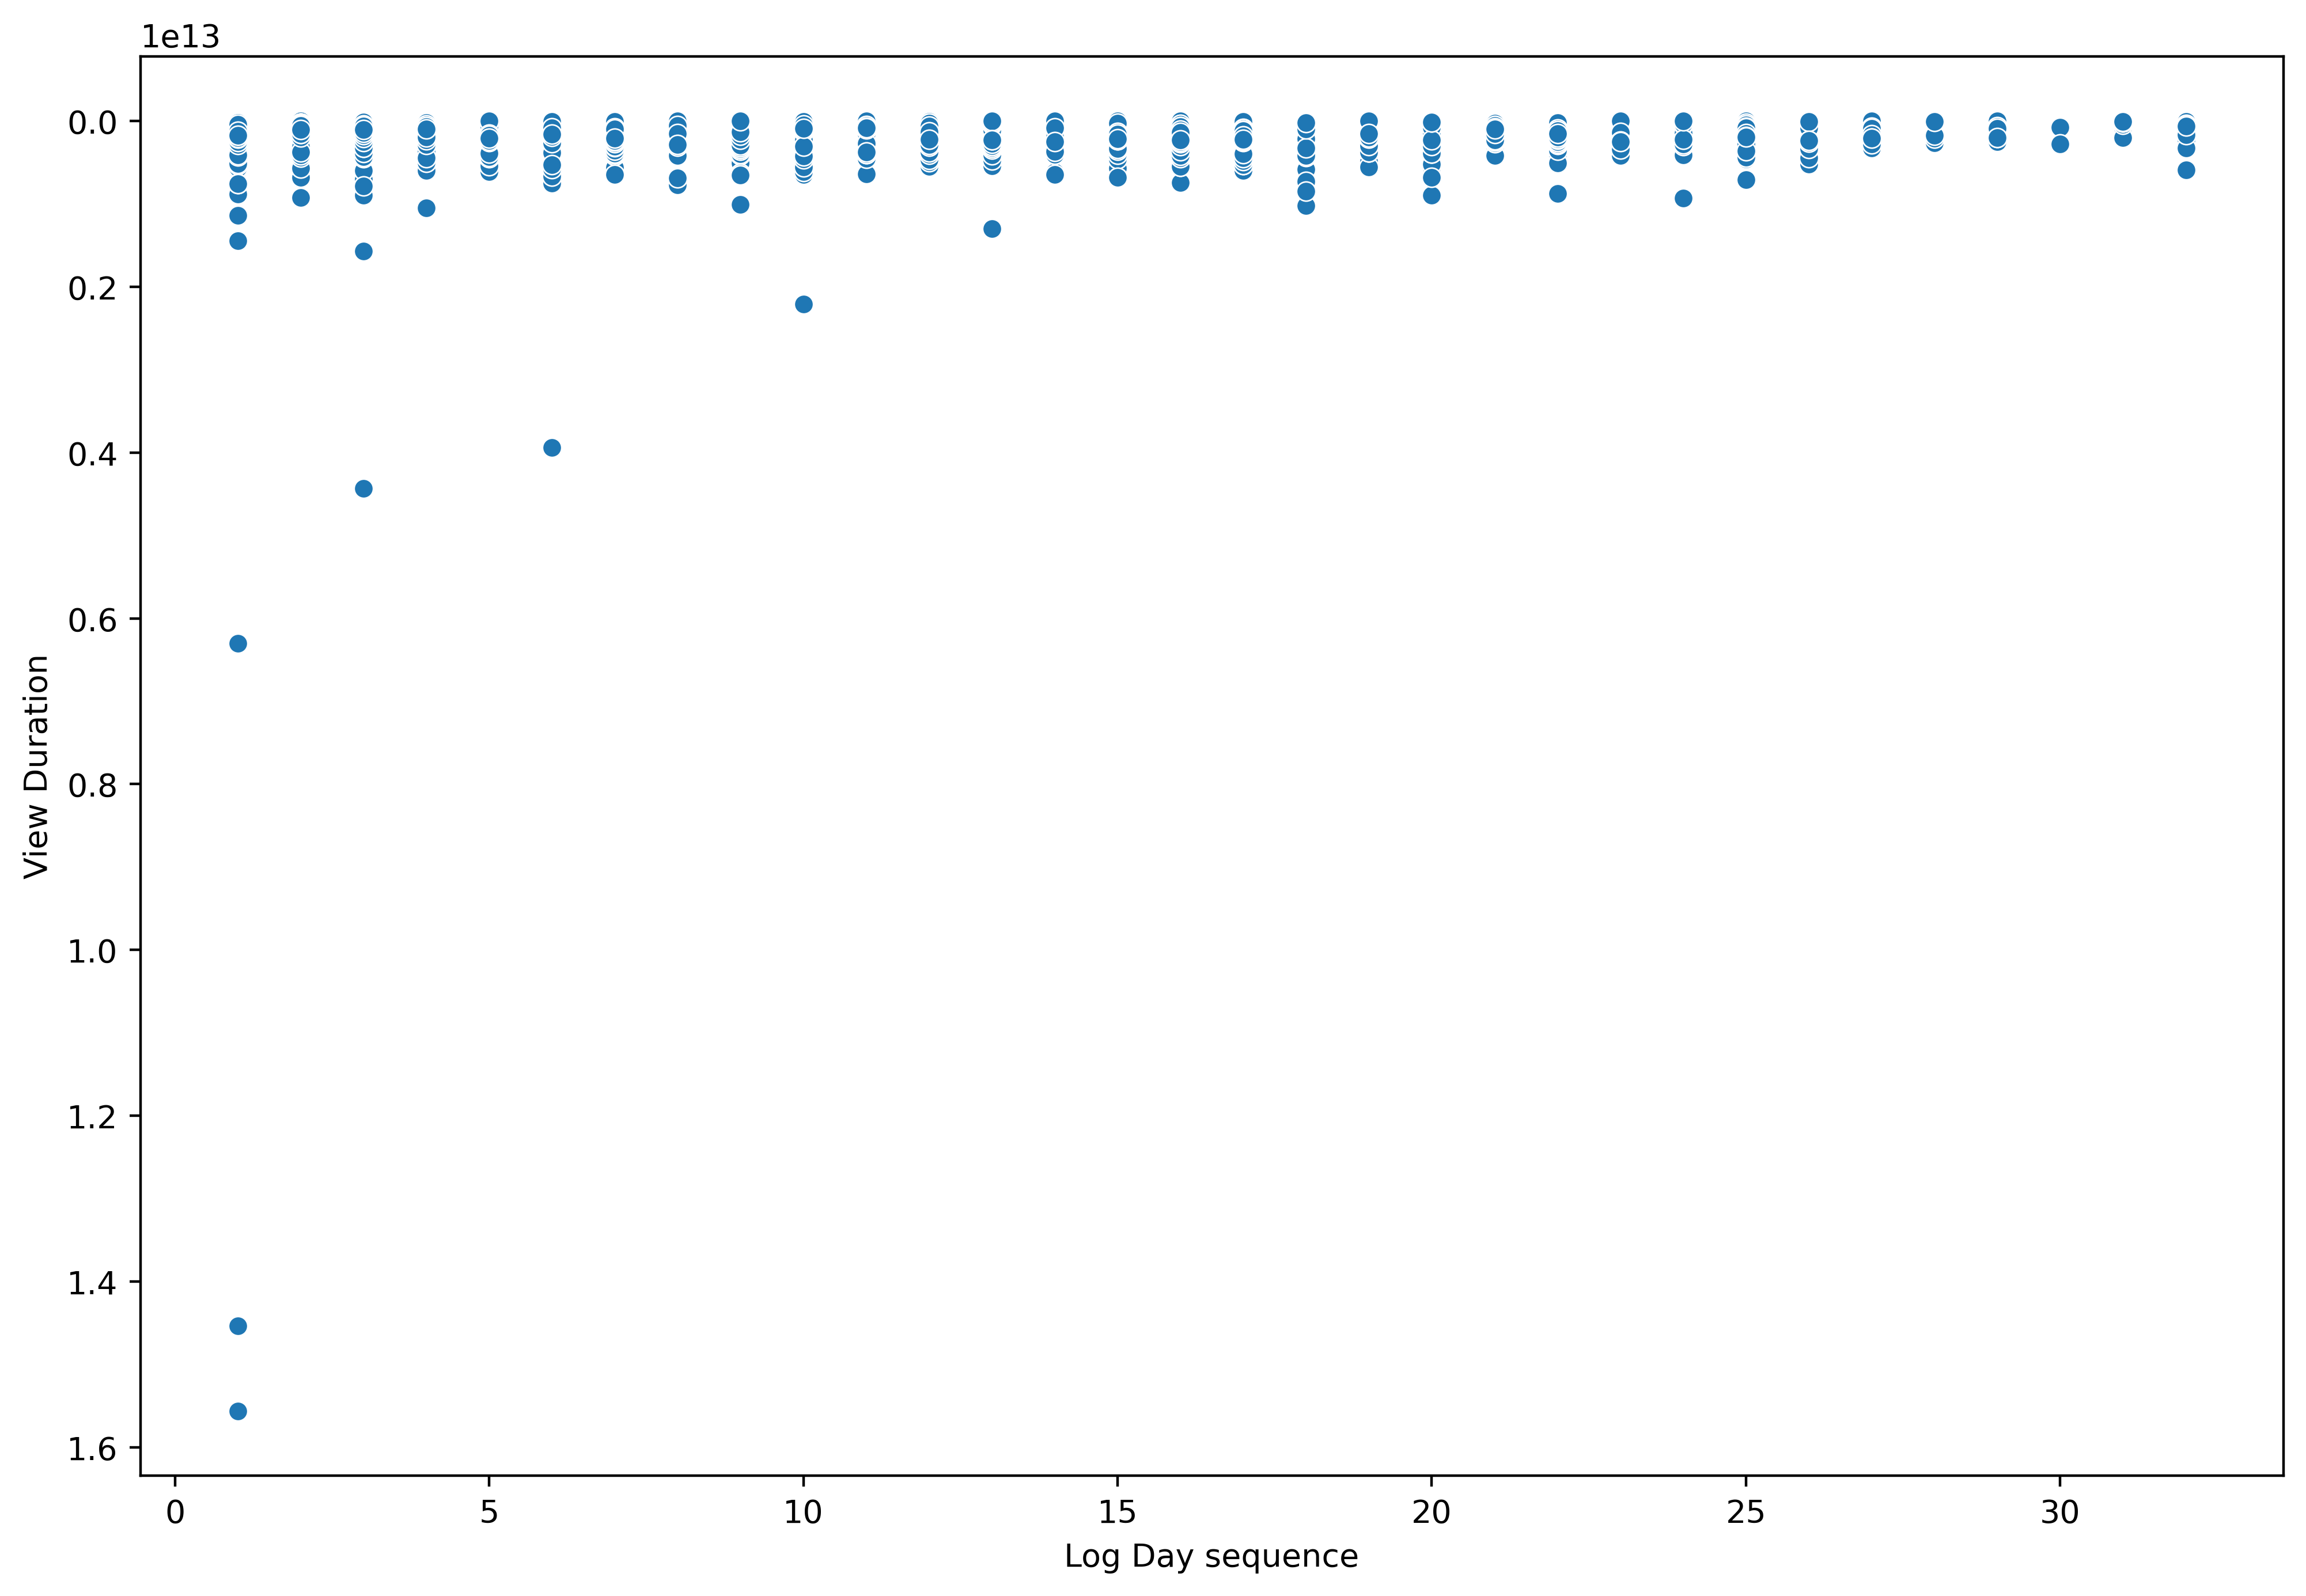

In [32]:
plt.figure(figsize=(12,8), dpi=400)

sns.scatterplot(x='log_day_sequence', y='view_duration', data=df)

plt.xlabel('Log Day sequence')
plt.ylabel('View Duration')

plt.savefig('./presen/fig/logDaySqViewDur.png')
plt.show()

In [17]:
df.episode_id == "ep00000282"

0        False
1        False
2        False
3        False
4        False
         ...  
23237    False
23238    False
23239    False
23240    False
23241    False
Name: episode_id, Length: 23242, dtype: bool

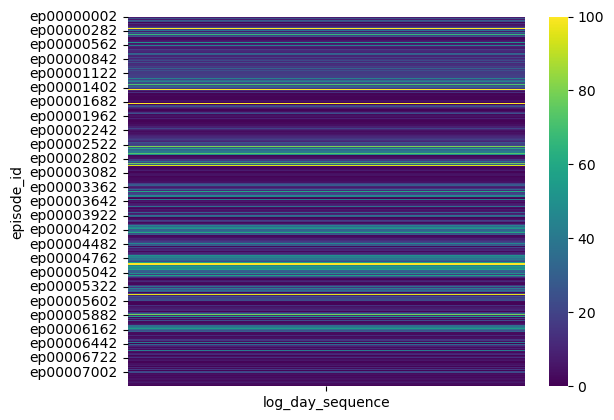

In [18]:
# trying a heatmap again
heatmap_data = df.pivot_table(values='log_day_sequence', index='episode_id', aggfunc='sum')
#heatmap_data = df[df['episode_id' == 'ep00000282']].pivot_table(values='log_day_sequence', index='episode_id', aggfunc='sum')

sns.heatmap(heatmap_data, annot=False, vmin = 0, vmax = 100, cmap='viridis')
plt.show()

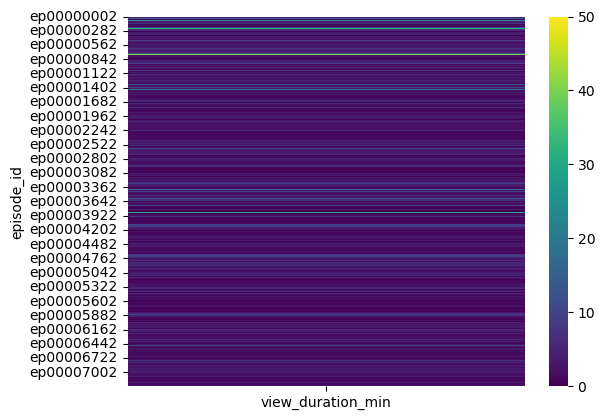

In [19]:
# trying a heatmap again

def view_duration_to_min(view_duration):
    return int(view_duration.total_seconds() / 60)

df['view_duration_min'] = df['view_duration'].apply(view_duration_to_min)
#df['view_duration_min'].max()

heatmap_data = df.pivot_table(values='view_duration_min', index='episode_id', aggfunc='sum')

sns.heatmap(heatmap_data, annot=False, vmin = 0, vmax = 50, cmap='viridis')
plt.show()

In [20]:
# Summarize the distribution of 'log_day_sequence'
log_day_sequence_distribution = df['log_day_sequence'].value_counts().sort_index()

log_day_sequence_distribution


log_day_sequence
1     5989
2     3007
3     2079
4     1441
5     1086
6      988
7      851
8      851
9      725
10     728
11     539
12     505
13     448
14     431
15     406
16     325
17     380
18     337
19     269
20     310
21     308
22     242
23     253
24     161
25     162
26     118
27     116
28      81
29      65
30       2
31      21
32      18
Name: count, dtype: int64

In [21]:
# Segmentation: Split data into one-time users and multi-login users based on 'log_day_sequence'
one_time_users = df[df['log_day_sequence'] == 1]
multi_login_users = df[df['log_day_sequence'] > 1]

# Compare viewing behavior: average view percentage and number of sessions per user for both groups
one_time_viewing = one_time_users.groupby('user_id').agg(
    avg_view_percent=('view_percent', 'mean'),
    total_sessions=('log_day_sequence', 'size')
).mean()

multi_login_viewing = multi_login_users.groupby('user_id').agg(
    avg_view_percent=('view_percent', 'mean'),
    total_sessions=('log_day_sequence', 'size')
).mean()

one_time_viewing, multi_login_viewing


(avg_view_percent    26.058085
 total_sessions       5.987988
 dtype: float64,
 avg_view_percent    31.614251
 total_sessions      44.581395
 dtype: float64)

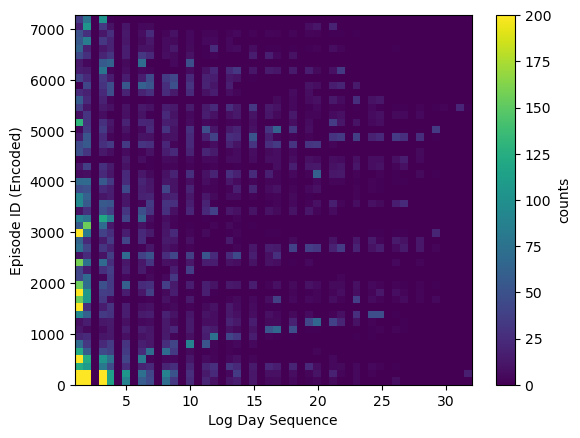

In [22]:
# Encode episode_id strings to intergers
le = LabelEncoder()
episode_ids_encoded = le.fit_transform(df['episode_id'])

# Convert log_day_sequence to numpy array if it's not already
log_day_sequence = df['log_day_sequence'].to_numpy()

# Create 2d histogram
plt.hist2d(log_day_sequence, episode_ids_encoded, bins=[50, 50], vmin = 0, vmax = 200, cmap='viridis')

# Add labels and color bar
plt.xlabel('Log Day Sequence')
plt.ylabel('Episode ID (Encoded)')
plt.colorbar(label='counts')

# show plot
plt.show()

In [25]:
# Encode episode_id strings to intergers
#le = LabelEncoder()
#episode_ids_encoded = le.fit_transform(df['episode_id'])

# Convert log_day_sequence to numpy array if it's not already
#log_day_sequence = df[df['log_day_sequence'] == 1].to_numpy()

# Create 2d histogram
#hist, xedges, yedges, image = plt.hist2d(log_day_sequence, episode_ids_encoded, bins=[50, 50], vmin = 0, vmax = 200, cmap='viridis')

#log_day_1_projection = hist[1, :]

#plt.bar(yedges[:-1], log_day_1_projection, width=np.diff(yedges))

# Add labels and color bar
#plt.xlabel('Log Day Sequence')
#plt.ylabel('Episode ID (Encoded)')
#plt.colorbar(label='counts')

# show plot
#plt.show()

In [26]:
episode_ids_encoded

array([   0,    0,    0, ..., 7268, 7269, 7270])

In [27]:
logDay1 = df[df['log_day_sequence'] == 1]

## `log_day_sequence == 1` `view_percent` histogram

<Axes: ylabel='Frequency'>

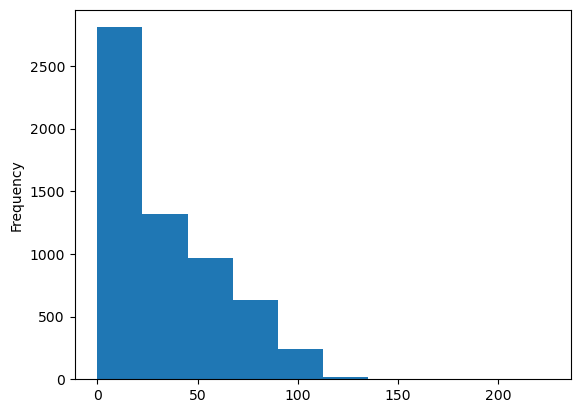

In [32]:
logDay1['view_percent'].plot(kind='hist')

UFuncTypeError: ufunc 'less' did not contain a loop with signature matching types (<class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

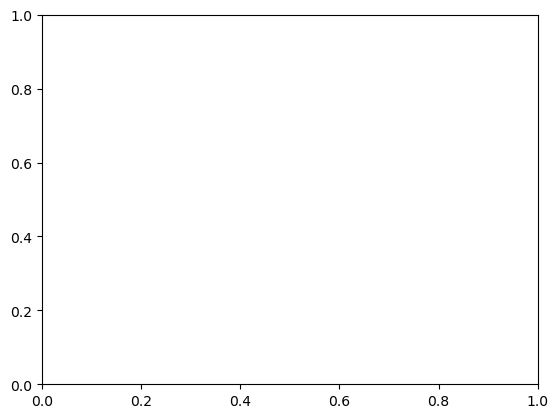

In [33]:
logDay1[''].plot(kind='hist')

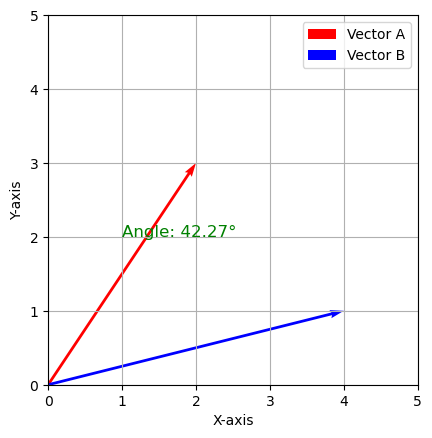

In [63]:
# Define two vectors
vector_1 = np.array([2, 3])  # Vector A
vector_2 = np.array([4, 1])  # Vector B

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the vectors using quiver (for arrow-like vectors)
ax.quiver(0, 0, vector_1[0], vector_1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
ax.quiver(0, 0, vector_2[0], vector_2[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# Calculate the angle between the vectors
dot_product = np.dot(vector_1, vector_2)
norms_product = np.linalg.norm(vector_1) * np.linalg.norm(vector_2)
angle = np.arccos(dot_product / norms_product)

# Convert angle to degrees for display
angle_degrees = np.degrees(angle)

# Annotate the angle between the vectors
ax.text(1, 2, f'Angle: {angle_degrees:.2f}°', fontsize=12, color='g')

# Set the aspect ratio of the plot to be equal
ax.set_aspect('equal')

# Set limits for the plot
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

# Add grid and labels
ax.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add legend
plt.legend()

# Show the plot
plt.show()

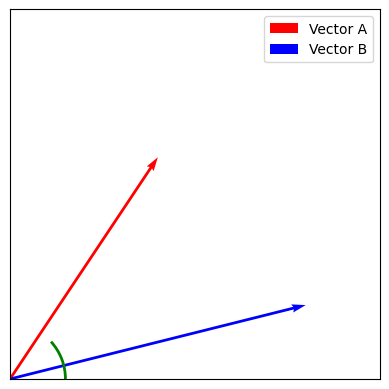

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Define two vectors
vector_1 = np.array([2, 3])  # Vector A
vector_2 = np.array([4, 1])  # Vector B

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the vectors using quiver (for arrow-like vectors)
ax.quiver(0, 0, vector_1[0], vector_1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
ax.quiver(0, 0, vector_2[0], vector_2[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# Calculate the angle between the vectors
dot_product = np.dot(vector_1, vector_2)
norms_product = np.linalg.norm(vector_1) * np.linalg.norm(vector_2)
angle_radians = np.arccos(dot_product / norms_product)

# Draw an arc to represent the angle between the vectors
arc = Arc((0, 0), 1.5, 1.5, theta1=0, theta2=np.degrees(angle_radians), color='g', lw=2)
ax.add_patch(arc)

# Hide grid, x and y labels
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Set the aspect ratio of the plot to be equal
ax.set_aspect('equal')

# Set limits for the plot
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

# Add legend to differentiate between the vectors
plt.legend()

# Show the plot
plt.show()


<Figure size 4800x3200 with 0 Axes>

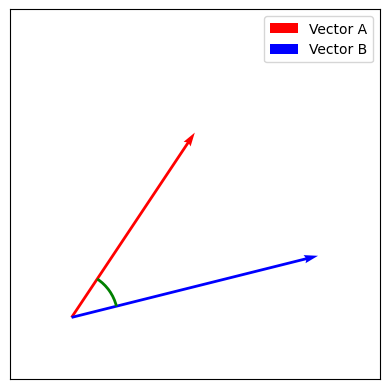

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Define two vectors
vector_1 = np.array([2, 3])  # Vector A
vector_2 = np.array([4, 1])  # Vector B

plt.figure(figsize=(12,8), dpi=400)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the vectors using quiver (for arrow-like vectors)
ax.quiver(0, 0, vector_1[0], vector_1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
ax.quiver(0, 0, vector_2[0], vector_2[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# Calculate the angle between the vectors
dot_product = np.dot(vector_1, vector_2)
norms_product = np.linalg.norm(vector_1) * np.linalg.norm(vector_2)
angle_radians = np.arccos(dot_product / norms_product)

# Calculate the angle of vector 1 and vector 2 with respect to the x-axis
angle_vector_1 = np.arctan2(vector_1[1], vector_1[0])
angle_vector_2 = np.arctan2(vector_2[1], vector_2[0])

# Calculate the start and end angles for the arc
start_angle = np.degrees(min(angle_vector_1, angle_vector_2))
end_angle = np.degrees(max(angle_vector_1, angle_vector_2))

# Draw an arc to represent the angle between the vectors
arc = Arc((0, 0), 1.5, 1.5, theta1=start_angle, theta2=end_angle, color='g', lw=2)
ax.add_patch(arc)

# Hide grid, x and y labels
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Set the aspect ratio of the plot to be equal
ax.set_aspect('equal')

# Set limits for the plot
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)

# Add legend to differentiate between the vectors
plt.legend()

plt.savefig('./presen/fig/cos.png')

# Show the plot
plt.show()
